In [1]:
import os
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import time
import random
# from tqdm.notebook import tqdm

module_path = os.path.abspath(os.path.join('../../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import ResNet as net_regular

    
import Resnet_multiscale_general_examine_training as net


mse_list = list()
step_size_list = list()
noise_list = list()
t_list_all = list()


In [3]:
len_all_combos = 1317
num_paths_per_cycle = 50
num_cycles = len_all_combos // num_paths_per_cycle + 1
print(num_cycles)
epoch = 26
print((epoch % num_cycles) * num_paths_per_cycle)
print(min((epoch % num_cycles+1) * num_paths_per_cycle, len_all_combos))

27
1300
1317


In [2]:
#===========================================================================================================

# adjustables

k = 2                       # model index: should be in {0, 2, ..., 10}
dt = 0.02                     # time unit: 0.0005 for Lorenz and 0.01 for others
system = 'VanDerPol'         # system name: 'Hyperbolic', 'Cubic', 'VanDerPol', 'Hopf' or 'Lorenz'
# system = 'Lorenz'

step_size = 4
noise = 0.02                  # noise percentage: 0.00, 0.01 or 0.02

lr = 1e-3                     # learning rate
max_epoch = 50000            # the maximum training epoch 
batch_size = 320              # training batch size
arch = [2, 512, 512, 512, 2]  # architecture of the neural network

# paths
data_dir = os.path.join('../../data/', system,)
model_dir = '../../models/VanDerPol_multiscale_general_train_examine'
# model_dir = '../../models/Lorenz_multiscale_general'

# global const
n_forward = 6
# step_size = 2**k


        
# load data
train_data = np.load(os.path.join(data_dir, 'train_noise{}.npy'.format(noise)))
val_data = np.load(os.path.join(data_dir, 'val_noise{}.npy'.format(noise)))
test_data = np.load(os.path.join(data_dir, 'test_noise{}.npy'.format(noise)))
n_train = train_data.shape[0]
n_val = val_data.shape[0]
n_test = test_data.shape[0]

print("train_data shape = ", train_data.shape)
print("val_data shape = ", val_data.shape)
print("test_data.shape = ", test_data.shape)

# n_forward = int(64/4)

# dataset = net.DataSet(train_data, val_data, test_data, dt, step_size, n_forward)

# print(dataset.train_ys.shape)

train_data shape =  (3200, 5121, 2)
val_data shape =  (320, 5121, 2)
test_data.shape =  (320, 5121, 2)


In [26]:
# load models
models = list()
#add letter models and the one without a letter. 
# model_name = 'model_D{}_noise{}.pt'.format(step_size, noise)
# models.append(torch.load(os.path.join(model_dir, model_name), map_location='cpu'))

for num in [12]:#letter in  ['a']:#'a', 'b', 'c', 'd', 'e']:
    # for noise in noise_levels:
#     try:
# model_long_D4_noise0.02_9.pt
        model_name = 'model_long_D{}_noise{}_{}.pt'.format(step_size, noise, num)
        print(model_name)
        print(os.path.join(model_dir, model_name))
        models.append(torch.load(os.path.join(model_dir, model_name), map_location='cpu'))
#     except:
#         print("not found")
#         break

for model in models:
    # fix model consistencies trained on gpus (optional)
    model.device = 'cpu'
    for step_size_this in model.step_sizes:
        model._modules[str(step_size_this)]._modules['activation'] = torch.nn.ReLU()
#     model._modules['large']._modules['activation'] = torch.nn.ReLU()
  

model_long_D4_noise0.02_12.pt
../../models/VanDerPol_multiscale_general_train_examine/model_long_D4_noise0.02_12.pt


/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [4]:
# load models
models_regular = list()
model_dir_regular = '../../models/VanDerPol'
# model_dir_regular = '../../models/Lorenz'
#add letter models and the one without a letter. 
# model_name = 'model_D{}_noise{}.pt'.format(step_size, noise)
# models.append(torch.load(os.path.join(model_dir, model_name), map_location='cpu'))

for step_size_this in [4,8,16]:
    # for noise in noise_levels:
    try:
        model_name = 'model_D{}_noise{}.pt'.format(step_size_this, noise)
        print(model_name)
        models_regular.append(torch.load(os.path.join(model_dir_regular, model_name), map_location='cpu'))
    except:
        print("not found")
        break

for model in models_regular:
    # fix model consistencies trained on gpus (optional)
    model.device = 'cpu'
    model._modules['increment']._modules['activation'] = torch.nn.ReLU()
  

model_D4_noise0.02.pt
model_D8_noise0.02.pt
model_D16_noise0.02.pt


/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [5]:
test_data = np.load(os.path.join(data_dir, 'test_noise{}.npy'.format(noise)))
test_data_perfect = np.load(os.path.join(data_dir, 'test_noise{}.npy'.format(0.0)))

print(test_data.shape)

(320, 5121, 2)


In [9]:
#want to find mse when just considering the smaller timescale

def predict_single_scale(model1, step_size, test_data=test_data, timesteps = 5000, size='small', to_plot=True):

    t = 0
    print(step_size)

    n_timepoints = timesteps // step_size + 2
    
    n_test_points, _, ndim = test_data.shape


    t_list = np.zeros(n_timepoints)
    y_pred_list = np.zeros((n_test_points, n_timepoints, ndim))

    y_pred_list[:,0] = test_data[:, 0]
    t_list[0] = 0
    t+= step_size
    y_preds = model1.forward(torch.tensor(test_data[:, 0]).float(), size)
    y_pred_list[:,1] = y_preds.detach().numpy()
    t_list[1] = t
    print(y_preds.shape)

    for j in range(2, n_timepoints):
        t+= step_size
        y_preds = model1.forward(y_preds, size)

        y_pred_list[:,j] = y_preds.detach().numpy()
        t_list[j] = t

    
    # need to interpolate between timesteps
    y_pred_list_new = np.zeros((n_test_points, timesteps, ndim))
    t_list_new = np.arange(0, timesteps)
    for i in range(len(y_pred_list)):
        for j in range(2):
            f = interp1d(t_list, y_pred_list[i,:,j])
            y_pred_list_new[i,:,j] = f(t_list_new)
    
    plt_idx = 1
    
    if to_plot:

        plt.plot(t_list_new, test_data[plt_idx,t_list_new.astype(int), 1])
        plt.plot(t_list_new, test_data[plt_idx,t_list_new.astype(int), 0])
#         plt.plot(t_list_new, test_data[plt_idx,t_list_new.astype(int), 2])

        plt.plot(t_list_new, y_pred_list_new[plt_idx,:, 1])
        plt.plot(t_list_new, y_pred_list_new[plt_idx,:, 0])
#         plt.plot(t_list_new, y_pred_list_new[plt_idx,:, 2])
        plt.title("At step 29: step_size = " + str(step_size)+ ": noise = "+ str(noise))

        plt.show()
    
    mse = np.mean((y_pred_list_new - test_data[:,t_list_new.astype(int)])**2, axis = (0,2))
    if to_plot:
        plt.semilogy(t_list_new, mse)
        plt.title("At step 29: step_size = " + str(step_size)+ ": noise = "+ str(noise))
        plt.show()
    
    
    return y_pred_list_new, mse, t_list_new
 




4
torch.Size([320, 2])


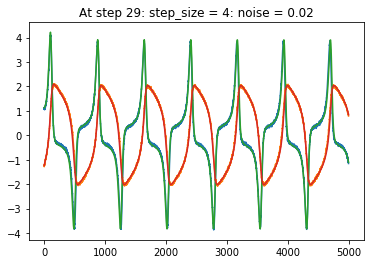

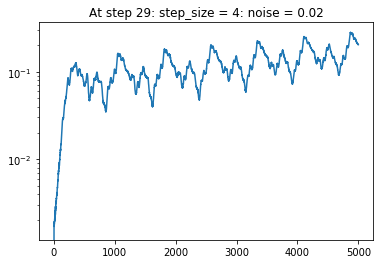

8
torch.Size([320, 2])


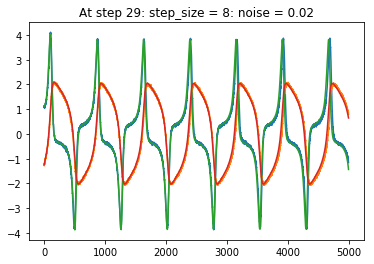

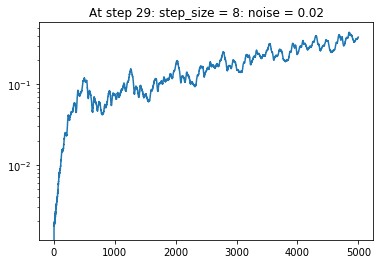

16
torch.Size([320, 2])


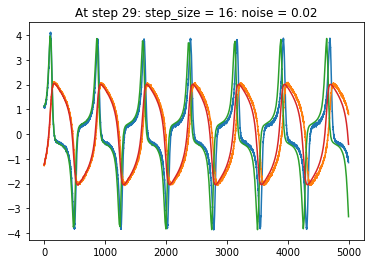

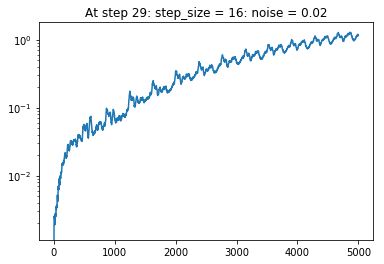

In [27]:
to_plot = True
y_pred_list_small, mse_small, t_list_small = predict_single_scale(models[0], 4, test_data=test_data, timesteps = 5000, 
                                                            size='4', to_plot=to_plot)
y_pred_list_mid, mse_mid, t_list_mid = predict_single_scale(models[0], 8, test_data=test_data, timesteps = 5000, 
                                                            size='8',to_plot=to_plot)
y_pred_list_large, mse_large, t_list_large = predict_single_scale(models[0], 16, test_data=test_data, timesteps = 5000, 
                                                                  size="16",to_plot=to_plot)

# y_pred_list_small, mse_small, t_list = predict_single_scale(models[0], 64, test_data=test_data, timesteps = 5000, 
#                                                             size='64', to_plot=to_plot)
# y_pred_list_mid, mse_mid, t_list_mid = predict_single_scale(models[0], 128, test_data=test_data, timesteps = 5000, 
#                                                             size='128',to_plot=to_plot)
# y_pred_list_large, mse_large, t_list_large = predict_single_scale(models[0], 256, test_data=test_data, timesteps = 5000, 
#                                                                   size="256",to_plot=to_plot)


In [53]:
t_list_small

array([   0,    1,    2, ..., 4997, 4998, 4999])

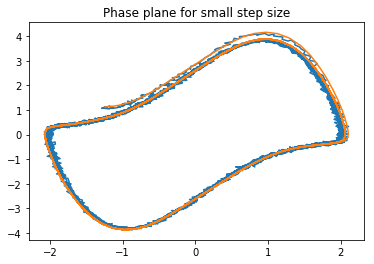

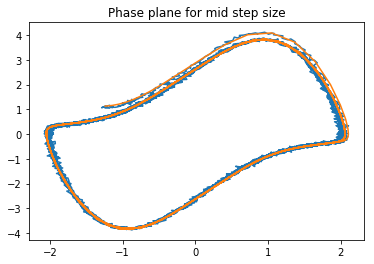

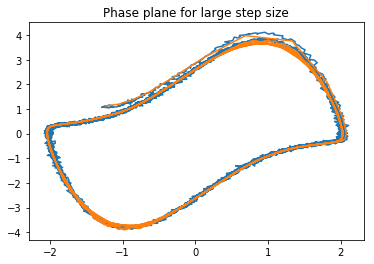

In [11]:
#plot the phase planes
y_pred_list_small.shape

idx = 1
plt.plot(test_data[idx,:,0], test_data[idx,:,1])
plt.plot(y_pred_list_small[idx,:,0], y_pred_list_small[idx,:,1])
plt.title("Phase plane for small step size")
plt.show()

plt.plot(test_data[idx,:,0], test_data[idx,:,1])
plt.plot(y_pred_list_mid[idx,:,0], y_pred_list_mid[idx,:,1])
plt.title("Phase plane for mid step size")
plt.show()

plt.plot(test_data[idx,:,0], test_data[idx,:,1])
plt.plot(y_pred_list_large[idx,:,0], y_pred_list_large[idx,:,1])
plt.title("Phase plane for large step size")
plt.show()

[  50  333  692 1049 1408 1765 2124 2481 2840 3197 3556 3913 4272 4629
 4989]


(0.5, -3)

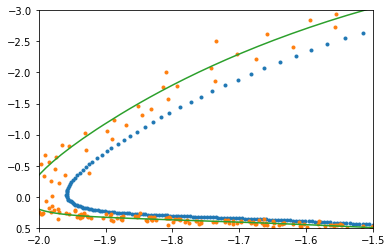

In [40]:
a = y_pred_list_small[0,:,1]
zero_crossings = np.where(np.diff(np.sign(a)))[0] #get the zero crossings. 

print(zero_crossings)
plt.plot(y_pred_list_small[idx,:zero_crossings[2],0], y_pred_list_small[idx,:zero_crossings[2],1], '.')
plt.plot(test_data[idx,:zero_crossings[2],0], test_data[idx,:zero_crossings[2],1], '.')

plt.plot(test_data_perfect[idx,:zero_crossings[2],0], test_data_perfect[idx,:zero_crossings[2],1])
# plt.plot(y_pred_list_small[idx,zero_crossings[2]:zero_crossings[4],0], y_pred_list_small[idx,zero_crossings[2]:zero_crossings[4],1], '.')
plt.xlim([-2, -1.5])
plt.ylim([0.5, -3])


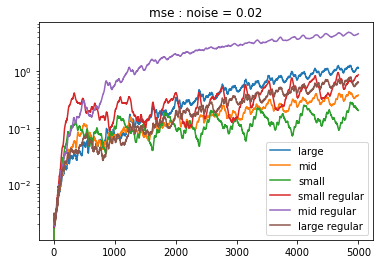

In [28]:

plt.semilogy(t_list_large, mse_large, label = "large")
plt.plot(t_list_mid, mse_mid, label = "mid")
plt.plot(t_list_small, mse_small, label = "small")
plt.title("mse : noise = " + str(noise))

# plt.xlim([0,1000])
# plt.ylim([0.0001, 1])

n_steps=5000
# y_preds_uni_small = models_regular[0].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
# mse_uni_small = torch.mean((y_preds_uni_small - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))

# y_preds_uni_mid = models_regular[1].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
# mse_uni_mid = torch.mean((y_preds_uni_mid - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))


# y_preds_uni_large = models_regular[2].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
# mse_uni_large = torch.mean((y_preds_uni_large - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))

plt.plot(mse_uni_small, label = "small regular")
plt.plot(mse_uni_mid, label = "mid regular")
plt.plot(mse_uni_large, label = "large regular")
plt.legend()

# y_preds = net_regular.vectorized_multi_scale_forecast(torch.tensor(test_data[:, 0, :]).float().to('cpu'), n_steps=n_steps, models=models_regular)
# mse_regular = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
# plt.semilogy(mse_regular, label = " multiscale regular")

plt.legend()

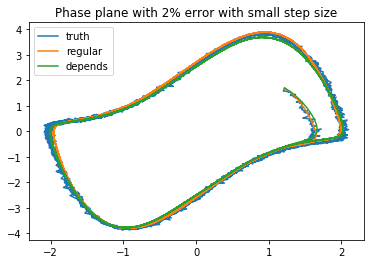

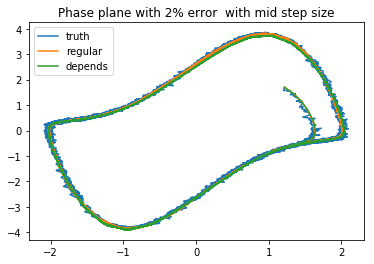

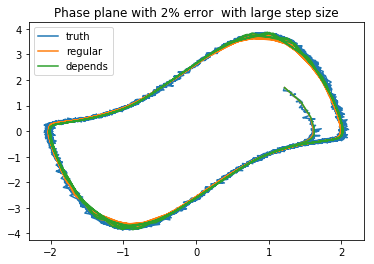

In [16]:
#plot the phase planes
y_pred_list_small.shape

idx = 0
plt.plot(test_data[idx,:,0], test_data[idx,:,1], label = "truth")
plt.plot(y_preds_uni_small[idx,:,0], y_preds_uni_small[idx,:,1], label = "regular")
plt.plot(y_pred_list_small[idx,:,0], y_pred_list_small[idx,:,1], label = "depends")
plt.title("Phase plane with 2% error with small step size")
plt.legend()
plt.show()

plt.plot(test_data[idx,:,0], test_data[idx,:,1], label = "truth")
plt.plot(y_preds_uni_mid[idx,:,0], y_preds_uni_mid[idx,:,1], label = "regular")
plt.plot(y_pred_list_mid[idx,:,0], y_pred_list_mid[idx,:,1], label = "depends")
plt.title("Phase plane with 2% error  with mid step size")
plt.legend()
plt.show()

plt.plot(test_data[idx,:,0], test_data[idx,:,1], label = "truth")
plt.plot(y_preds_uni_large[idx,:,0], y_preds_uni_large[idx,:,1], label = "regular")
plt.plot(y_pred_list_large[idx,:,0], y_pred_list_large[idx,:,1], label = "depends")
plt.title("Phase plane with 2% error  with large step size")
plt.legend()
plt.show()

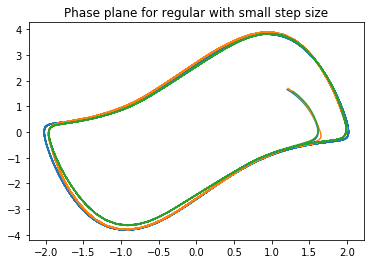

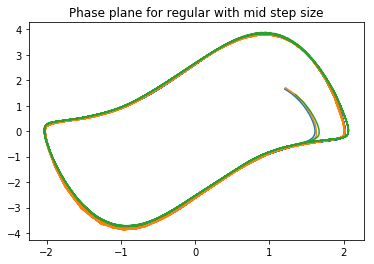

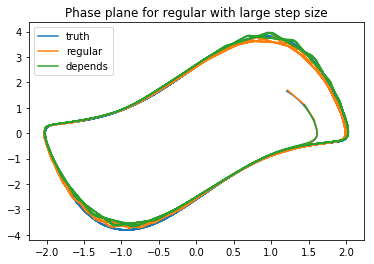

In [13]:
#plot the phase planes
y_pred_list_small.shape

idx = 0 
plt.plot(test_data_perfect[idx,:,0], test_data_perfect[idx,:,1])
plt.plot(y_preds_uni_small[idx,:,0], y_preds_uni_small[idx,:,1])
plt.plot(y_pred_list_small[idx,:,0], y_pred_list_small[idx,:,1])
plt.title("Phase plane for regular with small step size")
plt.show()

plt.plot(test_data_perfect[idx,:,0], test_data_perfect[idx,:,1])
plt.plot(y_preds_uni_mid[idx,:,0], y_preds_uni_mid[idx,:,1])
plt.plot(y_pred_list_mid[idx,:,0], y_pred_list_mid[idx,:,1])
plt.title("Phase plane for regular with mid step size")
plt.show()

plt.plot(test_data_perfect[idx,:,0], test_data_perfect[idx,:,1], label = "truth")
plt.plot(y_preds_uni_large[idx,:,0], y_preds_uni_large[idx,:,1], label = "regular")
plt.plot(y_pred_list_large[idx,:,0], y_pred_list_large[idx,:,1], label = "depends")
plt.title("Phase plane for regular with large step size")
plt.legend()
plt.show()

-2.020059588035252
2.02091507685052


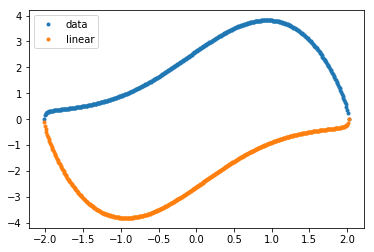

In [14]:
idx = 0
print(min(test_data_perfect[0,:,0]))
print(max(test_data_perfect[0,:,0]))

#only want top half so that it is a function

a = test_data_perfect[0,:,1]
zero_crossings = np.where(np.diff(np.sign(a)))[0] #get the zero crossings. 

a = test_data_perfect[0,:,0]
zero_crossings_flipped = np.where(np.diff(np.sign(a)))[0]

#interpolate from second to third crossing
x = np.linspace(-2, 2, num=11, endpoint=True)
# y = np.cos(-x**2/9.0)
f_top = interp1d(test_data_perfect[idx,zero_crossings[1]:zero_crossings[2]+1,0], test_data_perfect[idx,zero_crossings[1]:zero_crossings[2]+1,1])

f_bottom = interp1d(test_data_perfect[idx,zero_crossings[2]:zero_crossings[3]+1,0], test_data_perfect[idx,zero_crossings[2]:zero_crossings[3]+1,1])

f_top_flipped = interp1d(test_data_perfect[idx,zero_crossings_flipped[1]:zero_crossings_flipped[2]+1,1], test_data_perfect[idx,zero_crossings_flipped[1]:zero_crossings_flipped[2]+1,0])

f_bottom_flipped = interp1d(test_data_perfect[idx,zero_crossings_flipped[2]:zero_crossings_flipped[3]+1,1], test_data_perfect[idx,zero_crossings_flipped[2]:zero_crossings_flipped[3]+1,0])

# f2 = interp1d(test_data_perfect[0,:,0], test_data_perfect[0,:,1], kind='cubic')

xnew = np.linspace(min(test_data_perfect[idx,zero_crossings[1]:zero_crossings[2]+1,0]), max(test_data_perfect[idx,zero_crossings[1]:zero_crossings[2]+1,0]), num=410, endpoint=True)
import matplotlib.pyplot as plt
# ynew = f(x)
# plt.plot(test_data_perfect[0,:,0], test_data_perfect[0,:,1])
plt.plot( xnew, f_top(xnew), '.')
plt.plot( xnew, f_bottom(xnew), '.')#, xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')

# plt.plot([1.5], f(1.5), '.')
plt.show()



In [15]:
print(min(test_data_perfect[0,zero_crossings[1]-1:zero_crossings[2]+1,0]))
print(max(test_data_perfect[0,zero_crossings[1]-1:zero_crossings[2]+1,0]))

-2.017379971605368
2.020895460532061


In [17]:
#to calculate error, we find errors between both and take smaller one. 

# y_preds_uni_large[idx,:,0], y_preds_uni_large[idx,:,1]
mse_list_regular = list()
for i in range(len(y_preds_uni_large[idx,:,0])):
#     print(y_preds_uni_large[idx,i,0])
#     print("i = ", i)
    try:
        y1 = f_top(y_preds_uni_large[idx,i,0])
        y2 = f_bottom(y_preds_uni_large[idx,i,0])

    #     print(y_preds_uni_large[idx,i,1])

        mse1 = np.mean((y1 - y_preds_uni_large[idx,i,1].numpy())**2)
        mse2 = np.mean((y2 - y_preds_uni_large[idx,i,1].numpy())**2)
        mse_list_regular.append(np.min([mse1, mse2]))
    except:
        
        try:
            y1 = f_top_flipped(y_preds_uni_large[idx,i,1])
            y2 = f_bottom_flipped(y_preds_uni_large[idx,i,1])

        #     print(y_preds_uni_large[idx,i,1])

            mse1 = np.mean((y1 - y_preds_uni_large[idx,i,0].numpy())**2)
            mse2 = np.mean((y2 - y_preds_uni_large[idx,i,0].numpy())**2)
            mse_list_regular.append(np.min([mse1, mse2]))
        except:
            print("i = ", i)
            print(y_preds_uni_large[idx,i,0])
            print(y_preds_uni_large[idx,i,1])
        
#         mse_list.append(1)
#         print(y_preds_uni_large[idx,i,0])
#         hjk
    
#     print(y1)
#     print(y2)
#     print(y_preds_uni_large[idx,i,1])
    
#     plt.plot( xnew, f_top(xnew))
#     plt.plot( xnew, f_bottom(xnew))
#     plt.plot(y_preds_uni_large[idx,i,0], y1, '.')
#     plt.plot(y_preds_uni_large[idx,i,0], y2, '.')
#     plt.plot(y_preds_uni_large[idx,i,0], y_preds_uni_large[idx,i,1], '.', label = "truth")
#     plt.legend()
#     plt.show()
#     hjk

i =  0
tensor(1.2183)
tensor(1.7000)
i =  1
tensor(1.2335)
tensor(1.6616)
i =  2
tensor(1.2488)
tensor(1.6231)
i =  3
tensor(1.2640)
tensor(1.5846)
i =  4
tensor(1.2793)
tensor(1.5461)
i =  5
tensor(1.2945)
tensor(1.5076)
i =  6
tensor(1.3098)
tensor(1.4692)
i =  7
tensor(1.3250)
tensor(1.4307)
i =  8
tensor(1.3402)
tensor(1.3922)
i =  9
tensor(1.3555)
tensor(1.3537)
i =  10
tensor(1.3707)
tensor(1.3153)
i =  11
tensor(1.3860)
tensor(1.2768)
i =  12
tensor(1.4012)
tensor(1.2383)
i =  13
tensor(1.4165)
tensor(1.1998)
i =  14
tensor(1.4317)
tensor(1.1614)
i =  15
tensor(1.4470)
tensor(1.1229)
i =  16
tensor(1.4551)
tensor(1.0861)
i =  17
tensor(1.4632)
tensor(1.0493)
i =  18
tensor(1.4713)
tensor(1.0126)
i =  19
tensor(1.4794)
tensor(0.9758)
i =  20
tensor(1.4876)
tensor(0.9390)
i =  21
tensor(1.4957)
tensor(0.9023)
i =  22
tensor(1.5038)
tensor(0.8655)
i =  23
tensor(1.5119)
tensor(0.8287)
i =  24
tensor(1.5200)
tensor(0.7919)
i =  25
tensor(1.5281)
tensor(0.7552)
i =  26
tensor(1.5363)

tensor(0.3230)
i =  387
tensor(-1.9206)
tensor(0.3248)
i =  388
tensor(-1.9170)
tensor(0.3265)
i =  389
tensor(-1.9134)
tensor(0.3283)
i =  390
tensor(-1.9098)
tensor(0.3301)
i =  391
tensor(-1.9062)
tensor(0.3318)
i =  392
tensor(-1.9026)
tensor(0.3336)
i =  393
tensor(-1.8990)
tensor(0.3354)
i =  394
tensor(-1.8955)
tensor(0.3371)
i =  395
tensor(-1.8919)
tensor(0.3389)
i =  396
tensor(-1.8883)
tensor(0.3406)
i =  397
tensor(-1.8847)
tensor(0.3424)
i =  398
tensor(-1.8811)
tensor(0.3442)
i =  399
tensor(-1.8775)
tensor(0.3459)
i =  400
tensor(-1.8737)
tensor(0.3473)
i =  401
tensor(-1.8698)
tensor(0.3486)
i =  402
tensor(-1.8660)
tensor(0.3500)
i =  403
tensor(-1.8621)
tensor(0.3514)
i =  404
tensor(-1.8583)
tensor(0.3527)
i =  405
tensor(-1.8544)
tensor(0.3541)
i =  406
tensor(-1.8506)
tensor(0.3554)
i =  407
tensor(-1.8467)
tensor(0.3568)
i =  408
tensor(-1.8429)
tensor(0.3582)
i =  409
tensor(-1.8390)
tensor(0.3595)
i =  410
tensor(-1.8352)
tensor(0.3609)
i =  411
tensor(-1.8314)


tensor(-0.7210)
tensor(1.2926)
i =  596
tensor(-0.7075)
tensor(1.3145)
i =  597
tensor(-0.6940)
tensor(1.3365)
i =  598
tensor(-0.6805)
tensor(1.3585)
i =  599
tensor(-0.6670)
tensor(1.3805)
i =  600
tensor(-0.6535)
tensor(1.4024)
i =  601
tensor(-0.6400)
tensor(1.4244)
i =  602
tensor(-0.6265)
tensor(1.4464)
i =  603
tensor(-0.6130)
tensor(1.4684)
i =  604
tensor(-0.5996)
tensor(1.4903)
i =  605
tensor(-0.5861)
tensor(1.5123)
i =  606
tensor(-0.5726)
tensor(1.5343)
i =  607
tensor(-0.5591)
tensor(1.5563)
i =  608
tensor(-0.5416)
tensor(1.5880)
i =  609
tensor(-0.5242)
tensor(1.6198)
i =  610
tensor(-0.5068)
tensor(1.6515)
i =  611
tensor(-0.4894)
tensor(1.6833)
i =  612
tensor(-0.4719)
tensor(1.7150)
i =  613
tensor(-0.4545)
tensor(1.7468)
i =  614
tensor(-0.4371)
tensor(1.7785)
i =  615
tensor(-0.4196)
tensor(1.8103)
i =  616
tensor(-0.4022)
tensor(1.8420)
i =  617
tensor(-0.3848)
tensor(1.8738)
i =  618
tensor(-0.3674)
tensor(1.9055)
i =  619
tensor(-0.3499)
tensor(1.9373)
i =  620


tensor(-0.7296)
i =  920
tensor(1.1670)
tensor(-0.7357)
i =  921
tensor(1.1600)
tensor(-0.7418)
i =  922
tensor(1.1530)
tensor(-0.7479)
i =  923
tensor(1.1460)
tensor(-0.7541)
i =  924
tensor(1.1390)
tensor(-0.7602)
i =  925
tensor(1.1320)
tensor(-0.7663)
i =  926
tensor(1.1250)
tensor(-0.7724)
i =  927
tensor(1.1180)
tensor(-0.7785)
i =  928
tensor(1.1093)
tensor(-0.7870)
i =  929
tensor(1.1006)
tensor(-0.7955)
i =  930
tensor(1.0920)
tensor(-0.8040)
i =  931
tensor(1.0833)
tensor(-0.8125)
i =  932
tensor(1.0746)
tensor(-0.8210)
i =  933
tensor(1.0659)
tensor(-0.8295)
i =  934
tensor(1.0572)
tensor(-0.8381)
i =  935
tensor(1.0485)
tensor(-0.8466)
i =  936
tensor(1.0398)
tensor(-0.8551)
i =  937
tensor(1.0311)
tensor(-0.8636)
i =  938
tensor(1.0224)
tensor(-0.8721)
i =  939
tensor(1.0137)
tensor(-0.8806)
i =  940
tensor(1.0050)
tensor(-0.8891)
i =  941
tensor(0.9963)
tensor(-0.8976)
i =  942
tensor(0.9876)
tensor(-0.9061)
i =  943
tensor(0.9789)
tensor(-0.9146)
i =  944
tensor(0.9684)


tensor(-1.2045)
tensor(0.7219)
i =  1299
tensor(-1.1972)
tensor(0.7281)
i =  1300
tensor(-1.1899)
tensor(0.7342)
i =  1301
tensor(-1.1826)
tensor(0.7403)
i =  1302
tensor(-1.1753)
tensor(0.7465)
i =  1303
tensor(-1.1680)
tensor(0.7526)
i =  1304
tensor(-1.1607)
tensor(0.7588)
i =  1305
tensor(-1.1533)
tensor(0.7649)
i =  1306
tensor(-1.1460)
tensor(0.7710)
i =  1307
tensor(-1.1387)
tensor(0.7772)
i =  1308
tensor(-1.1314)
tensor(0.7833)
i =  1309
tensor(-1.1241)
tensor(0.7894)
i =  1310
tensor(-1.1168)
tensor(0.7956)
i =  1311
tensor(-1.1095)
tensor(0.8017)
i =  1312
tensor(-1.1015)
tensor(0.8097)
i =  1313
tensor(-1.0934)
tensor(0.8177)
i =  1314
tensor(-1.0854)
tensor(0.8258)
i =  1315
tensor(-1.0774)
tensor(0.8338)
i =  1316
tensor(-1.0694)
tensor(0.8418)
i =  1317
tensor(-1.0613)
tensor(0.8498)
i =  1318
tensor(-1.0533)
tensor(0.8578)
i =  1319
tensor(-1.0453)
tensor(0.8658)
i =  1320
tensor(-1.0372)
tensor(0.8738)
i =  1321
tensor(-1.0292)
tensor(0.8818)
i =  1322
tensor(-1.0212)


tensor(1.9654)
tensor(-0.2378)
i =  1505
tensor(1.9626)
tensor(-0.2418)
i =  1506
tensor(1.9598)
tensor(-0.2457)
i =  1507
tensor(1.9570)
tensor(-0.2497)
i =  1508
tensor(1.9542)
tensor(-0.2537)
i =  1509
tensor(1.9513)
tensor(-0.2576)
i =  1510
tensor(1.9485)
tensor(-0.2616)
i =  1511
tensor(1.9457)
tensor(-0.2656)
i =  1512
tensor(1.9429)
tensor(-0.2696)
i =  1513
tensor(1.9401)
tensor(-0.2735)
i =  1514
tensor(1.9372)
tensor(-0.2775)
i =  1515
tensor(1.9344)
tensor(-0.2815)
i =  1516
tensor(1.9316)
tensor(-0.2854)
i =  1517
tensor(1.9288)
tensor(-0.2894)
i =  1518
tensor(1.9260)
tensor(-0.2934)
i =  1519
tensor(1.9232)
tensor(-0.2974)
i =  1520
tensor(1.9201)
tensor(-0.2995)
i =  1521
tensor(1.9170)
tensor(-0.3017)
i =  1522
tensor(1.9139)
tensor(-0.3039)
i =  1523
tensor(1.9108)
tensor(-0.3060)
i =  1524
tensor(1.9077)
tensor(-0.3082)
i =  1525
tensor(1.9046)
tensor(-0.3104)
i =  1526
tensor(1.9015)
tensor(-0.3125)
i =  1527
tensor(1.8984)
tensor(-0.3147)
i =  1528
tensor(1.8953)
t

tensor(0.0811)
i =  1861
tensor(-2.0225)
tensor(0.0930)
i =  1862
tensor(-2.0214)
tensor(0.1049)
i =  1863
tensor(-2.0203)
tensor(0.1168)
i =  1864
tensor(-2.0193)
tensor(0.1286)
i =  1865
tensor(-2.0182)
tensor(0.1405)
i =  1866
tensor(-2.0171)
tensor(0.1524)
i =  1867
tensor(-2.0160)
tensor(0.1643)
i =  1868
tensor(-2.0149)
tensor(0.1762)
i =  1869
tensor(-2.0138)
tensor(0.1880)
i =  1870
tensor(-2.0127)
tensor(0.1999)
i =  1871
tensor(-2.0117)
tensor(0.2118)
i =  1872
tensor(-2.0092)
tensor(0.2169)
i =  1873
tensor(-2.0066)
tensor(0.2220)
i =  1874
tensor(-2.0041)
tensor(0.2271)
i =  1875
tensor(-2.0016)
tensor(0.2322)
i =  1876
tensor(-1.9991)
tensor(0.2373)
i =  1877
tensor(-1.9966)
tensor(0.2424)
i =  1878
tensor(-1.9941)
tensor(0.2475)
i =  1879
tensor(-1.9916)
tensor(0.2526)
i =  1880
tensor(-1.9891)
tensor(0.2577)
i =  1881
tensor(-1.9866)
tensor(0.2628)
i =  1882
tensor(-1.9841)
tensor(0.2679)
i =  1883
tensor(-1.9816)
tensor(0.2730)
i =  1884
tensor(-1.9791)
tensor(0.2781)
i

tensor(3.6461)
i =  2173
tensor(0.7339)
tensor(3.6890)
i =  2174
tensor(0.7690)
tensor(3.7318)
i =  2175
tensor(0.8041)
tensor(3.7746)
i =  2176
tensor(0.8402)
tensor(3.7447)
i =  2177
tensor(0.8762)
tensor(3.7147)
i =  2178
tensor(0.9123)
tensor(3.6848)
i =  2179
tensor(0.9484)
tensor(3.6548)
i =  2180
tensor(0.9845)
tensor(3.6249)
i =  2181
tensor(1.0205)
tensor(3.5949)
i =  2182
tensor(1.0566)
tensor(3.5650)
i =  2183
tensor(1.0927)
tensor(3.5350)
i =  2184
tensor(1.1287)
tensor(3.5051)
i =  2185
tensor(1.1648)
tensor(3.4752)
i =  2186
tensor(1.2009)
tensor(3.4452)
i =  2187
tensor(1.2370)
tensor(3.4153)
i =  2188
tensor(1.2730)
tensor(3.3853)
i =  2189
tensor(1.3091)
tensor(3.3554)
i =  2190
tensor(1.3452)
tensor(3.3254)
i =  2191
tensor(1.3812)
tensor(3.2955)
i =  2192
tensor(1.4063)
tensor(3.2012)
i =  2193
tensor(1.4313)
tensor(3.1070)
i =  2194
tensor(1.4564)
tensor(3.0128)
i =  2195
tensor(1.4814)
tensor(2.9185)
i =  2196
tensor(1.5065)
tensor(2.8243)
i =  2197
tensor(1.5315)


tensor(-2.5582)
i =  2569
tensor(-1.6289)
tensor(-2.4658)
i =  2570
tensor(-1.6564)
tensor(-2.3734)
i =  2571
tensor(-1.6838)
tensor(-2.2810)
i =  2572
tensor(-1.7113)
tensor(-2.1886)
i =  2573
tensor(-1.7388)
tensor(-2.0962)
i =  2574
tensor(-1.7662)
tensor(-2.0038)
i =  2575
tensor(-1.7937)
tensor(-1.9114)
i =  2576
tensor(-1.8054)
tensor(-1.8321)
i =  2577
tensor(-1.8171)
tensor(-1.7528)
i =  2578
tensor(-1.8287)
tensor(-1.6735)
i =  2579
tensor(-1.8404)
tensor(-1.5942)
i =  2580
tensor(-1.8521)
tensor(-1.5149)
i =  2581
tensor(-1.8638)
tensor(-1.4355)
i =  2582
tensor(-1.8755)
tensor(-1.3562)
i =  2583
tensor(-1.8872)
tensor(-1.2769)
i =  2584
tensor(-1.8988)
tensor(-1.1976)
i =  2585
tensor(-1.9105)
tensor(-1.1183)
i =  2586
tensor(-1.9222)
tensor(-1.0390)
i =  2587
tensor(-1.9339)
tensor(-0.9596)
i =  2588
tensor(-1.9456)
tensor(-0.8803)
i =  2589
tensor(-1.9573)
tensor(-0.8010)
i =  2590
tensor(-1.9689)
tensor(-0.7217)
i =  2591
tensor(-1.9806)
tensor(-0.6424)
i =  2592
tensor(-

tensor(-1.4331)
tensor(0.5575)
i =  2776
tensor(-1.4280)
tensor(0.5605)
i =  2777
tensor(-1.4230)
tensor(0.5635)
i =  2778
tensor(-1.4179)
tensor(0.5666)
i =  2779
tensor(-1.4129)
tensor(0.5696)
i =  2780
tensor(-1.4078)
tensor(0.5726)
i =  2781
tensor(-1.4028)
tensor(0.5757)
i =  2782
tensor(-1.3977)
tensor(0.5787)
i =  2783
tensor(-1.3926)
tensor(0.5817)
i =  2784
tensor(-1.3867)
tensor(0.5858)
i =  2785
tensor(-1.3808)
tensor(0.5900)
i =  2786
tensor(-1.3748)
tensor(0.5941)
i =  2787
tensor(-1.3689)
tensor(0.5982)
i =  2788
tensor(-1.3630)
tensor(0.6023)
i =  2789
tensor(-1.3570)
tensor(0.6064)
i =  2790
tensor(-1.3511)
tensor(0.6105)
i =  2791
tensor(-1.3452)
tensor(0.6146)
i =  2792
tensor(-1.3392)
tensor(0.6187)
i =  2793
tensor(-1.3333)
tensor(0.6228)
i =  2794
tensor(-1.3274)
tensor(0.6269)
i =  2795
tensor(-1.3214)
tensor(0.6310)
i =  2796
tensor(-1.3155)
tensor(0.6351)
i =  2797
tensor(-1.3096)
tensor(0.6392)
i =  2798
tensor(-1.3036)
tensor(0.6433)
i =  2799
tensor(-1.2977)


tensor(0.6765)
i =  2979
tensor(1.9458)
tensor(0.6331)
i =  2980
tensor(1.9501)
tensor(0.5897)
i =  2981
tensor(1.9544)
tensor(0.5464)
i =  2982
tensor(1.9587)
tensor(0.5030)
i =  2983
tensor(1.9629)
tensor(0.4596)
i =  2984
tensor(1.9672)
tensor(0.4163)
i =  2985
tensor(1.9715)
tensor(0.3729)
i =  2986
tensor(1.9758)
tensor(0.3295)
i =  2987
tensor(1.9801)
tensor(0.2862)
i =  2988
tensor(1.9843)
tensor(0.2428)
i =  2989
tensor(1.9886)
tensor(0.1994)
i =  2990
tensor(1.9929)
tensor(0.1560)
i =  2991
tensor(1.9972)
tensor(0.1127)
i =  2992
tensor(1.9966)
tensor(0.0962)
i =  2993
tensor(1.9961)
tensor(0.0798)
i =  2994
tensor(1.9955)
tensor(0.0633)
i =  2995
tensor(1.9950)
tensor(0.0469)
i =  2996
tensor(1.9944)
tensor(0.0304)
i =  2997
tensor(1.9938)
tensor(0.0140)
i =  2998
tensor(1.9933)
tensor(-0.0025)
i =  2999
tensor(1.9927)
tensor(-0.0189)
i =  3000
tensor(1.9922)
tensor(-0.0353)
i =  3001
tensor(1.9916)
tensor(-0.0518)
i =  3002
tensor(1.9910)
tensor(-0.0682)
i =  3003
tensor(1.9

tensor(-0.6858)
i =  3184
tensor(1.2169)
tensor(-0.6920)
i =  3185
tensor(1.2098)
tensor(-0.6981)
i =  3186
tensor(1.2028)
tensor(-0.7043)
i =  3187
tensor(1.1957)
tensor(-0.7105)
i =  3188
tensor(1.1886)
tensor(-0.7167)
i =  3189
tensor(1.1816)
tensor(-0.7228)
i =  3190
tensor(1.1745)
tensor(-0.7290)
i =  3191
tensor(1.1675)
tensor(-0.7352)
i =  3192
tensor(1.1604)
tensor(-0.7414)
i =  3193
tensor(1.1533)
tensor(-0.7476)
i =  3194
tensor(1.1463)
tensor(-0.7537)
i =  3195
tensor(1.1392)
tensor(-0.7599)
i =  3196
tensor(1.1322)
tensor(-0.7661)
i =  3197
tensor(1.1251)
tensor(-0.7723)
i =  3198
tensor(1.1180)
tensor(-0.7784)
i =  3199
tensor(1.1110)
tensor(-0.7846)
i =  3200
tensor(1.1022)
tensor(-0.7933)
i =  3201
tensor(1.0934)
tensor(-0.8021)
i =  3202
tensor(1.0846)
tensor(-0.8108)
i =  3203
tensor(1.0758)
tensor(-0.8195)
i =  3204
tensor(1.0669)
tensor(-0.8282)
i =  3205
tensor(1.0581)
tensor(-0.8369)
i =  3206
tensor(1.0493)
tensor(-0.8457)
i =  3207
tensor(1.0405)
tensor(-0.8544)


tensor(-2.0022)
tensor(0.2606)
i =  3392
tensor(-1.9991)
tensor(0.2636)
i =  3393
tensor(-1.9959)
tensor(0.2666)
i =  3394
tensor(-1.9927)
tensor(0.2696)
i =  3395
tensor(-1.9895)
tensor(0.2726)
i =  3396
tensor(-1.9864)
tensor(0.2757)
i =  3397
tensor(-1.9832)
tensor(0.2787)
i =  3398
tensor(-1.9800)
tensor(0.2817)
i =  3399
tensor(-1.9768)
tensor(0.2847)
i =  3400
tensor(-1.9737)
tensor(0.2877)
i =  3401
tensor(-1.9705)
tensor(0.2908)
i =  3402
tensor(-1.9673)
tensor(0.2938)
i =  3403
tensor(-1.9641)
tensor(0.2968)
i =  3404
tensor(-1.9609)
tensor(0.2998)
i =  3405
tensor(-1.9578)
tensor(0.3028)
i =  3406
tensor(-1.9546)
tensor(0.3058)
i =  3407
tensor(-1.9514)
tensor(0.3089)
i =  3408
tensor(-1.9479)
tensor(0.3107)
i =  3409
tensor(-1.9444)
tensor(0.3126)
i =  3410
tensor(-1.9408)
tensor(0.3144)
i =  3411
tensor(-1.9373)
tensor(0.3163)
i =  3412
tensor(-1.9338)
tensor(0.3182)
i =  3413
tensor(-1.9302)
tensor(0.3200)
i =  3414
tensor(-1.9267)
tensor(0.3219)
i =  3415
tensor(-1.9232)


tensor(-0.9710)
tensor(0.9430)
i =  3601
tensor(-0.9612)
tensor(0.9557)
i =  3602
tensor(-0.9515)
tensor(0.9684)
i =  3603
tensor(-0.9417)
tensor(0.9812)
i =  3604
tensor(-0.9320)
tensor(0.9939)
i =  3605
tensor(-0.9222)
tensor(1.0066)
i =  3606
tensor(-0.9125)
tensor(1.0193)
i =  3607
tensor(-0.9027)
tensor(1.0321)
i =  3608
tensor(-0.8930)
tensor(1.0448)
i =  3609
tensor(-0.8832)
tensor(1.0575)
i =  3610
tensor(-0.8735)
tensor(1.0702)
i =  3611
tensor(-0.8637)
tensor(1.0830)
i =  3612
tensor(-0.8540)
tensor(1.0957)
i =  3613
tensor(-0.8442)
tensor(1.1084)
i =  3614
tensor(-0.8345)
tensor(1.1211)
i =  3615
tensor(-0.8247)
tensor(1.1339)
i =  3616
tensor(-0.8125)
tensor(1.1529)
i =  3617
tensor(-0.8004)
tensor(1.1719)
i =  3618
tensor(-0.7882)
tensor(1.1909)
i =  3619
tensor(-0.7760)
tensor(1.2099)
i =  3620
tensor(-0.7638)
tensor(1.2290)
i =  3621
tensor(-0.7516)
tensor(1.2480)
i =  3622
tensor(-0.7394)
tensor(1.2670)
i =  3623
tensor(-0.7272)
tensor(1.2860)
i =  3624
tensor(-0.7151)


tensor(1.8796)
tensor(-0.3278)
i =  3806
tensor(1.8765)
tensor(-0.3299)
i =  3807
tensor(1.8734)
tensor(-0.3321)
i =  3808
tensor(1.8696)
tensor(-0.3337)
i =  3809
tensor(1.8658)
tensor(-0.3353)
i =  3810
tensor(1.8620)
tensor(-0.3369)
i =  3811
tensor(1.8582)
tensor(-0.3385)
i =  3812
tensor(1.8544)
tensor(-0.3402)
i =  3813
tensor(1.8506)
tensor(-0.3418)
i =  3814
tensor(1.8468)
tensor(-0.3434)
i =  3815
tensor(1.8430)
tensor(-0.3450)
i =  3816
tensor(1.8392)
tensor(-0.3466)
i =  3817
tensor(1.8355)
tensor(-0.3482)
i =  3818
tensor(1.8317)
tensor(-0.3498)
i =  3819
tensor(1.8279)
tensor(-0.3514)
i =  3820
tensor(1.8241)
tensor(-0.3530)
i =  3821
tensor(1.8203)
tensor(-0.3546)
i =  3822
tensor(1.8165)
tensor(-0.3562)
i =  3823
tensor(1.8127)
tensor(-0.3578)
i =  3824
tensor(1.8082)
tensor(-0.3595)
i =  3825
tensor(1.8037)
tensor(-0.3612)
i =  3826
tensor(1.7991)
tensor(-0.3629)
i =  3827
tensor(1.7946)
tensor(-0.3646)
i =  3828
tensor(1.7901)
tensor(-0.3663)
i =  3829
tensor(1.7856)
t

tensor(0.3329)
i =  4179
tensor(-1.9019)
tensor(0.3346)
i =  4180
tensor(-1.8983)
tensor(0.3362)
i =  4181
tensor(-1.8946)
tensor(0.3378)
i =  4182
tensor(-1.8910)
tensor(0.3394)
i =  4183
tensor(-1.8873)
tensor(0.3410)
i =  4184
tensor(-1.8837)
tensor(0.3427)
i =  4185
tensor(-1.8800)
tensor(0.3443)
i =  4186
tensor(-1.8764)
tensor(0.3459)
i =  4187
tensor(-1.8727)
tensor(0.3475)
i =  4188
tensor(-1.8690)
tensor(0.3492)
i =  4189
tensor(-1.8654)
tensor(0.3508)
i =  4190
tensor(-1.8617)
tensor(0.3524)
i =  4191
tensor(-1.8581)
tensor(0.3540)
i =  4192
tensor(-1.8541)
tensor(0.3553)
i =  4193
tensor(-1.8502)
tensor(0.3566)
i =  4194
tensor(-1.8463)
tensor(0.3579)
i =  4195
tensor(-1.8423)
tensor(0.3591)
i =  4196
tensor(-1.8384)
tensor(0.3604)
i =  4197
tensor(-1.8344)
tensor(0.3617)
i =  4198
tensor(-1.8305)
tensor(0.3629)
i =  4199
tensor(-1.8266)
tensor(0.3642)
i =  4200
tensor(-1.8226)
tensor(0.3655)
i =  4201
tensor(-1.8187)
tensor(0.3668)
i =  4202
tensor(-1.8148)
tensor(0.3680)
i

tensor(1.9532)
tensor(-0.2290)
i =  4536
tensor(1.9505)
tensor(-0.2347)
i =  4537
tensor(1.9479)
tensor(-0.2405)
i =  4538
tensor(1.9452)
tensor(-0.2462)
i =  4539
tensor(1.9426)
tensor(-0.2520)
i =  4540
tensor(1.9399)
tensor(-0.2577)
i =  4541
tensor(1.9373)
tensor(-0.2635)
i =  4542
tensor(1.9346)
tensor(-0.2692)
i =  4543
tensor(1.9320)
tensor(-0.2750)
i =  4544
tensor(1.9289)
tensor(-0.2778)
i =  4545
tensor(1.9259)
tensor(-0.2807)
i =  4546
tensor(1.9229)
tensor(-0.2836)
i =  4547
tensor(1.9199)
tensor(-0.2865)
i =  4548
tensor(1.9168)
tensor(-0.2893)
i =  4549
tensor(1.9138)
tensor(-0.2922)
i =  4550
tensor(1.9108)
tensor(-0.2951)
i =  4551
tensor(1.9078)
tensor(-0.2980)
i =  4552
tensor(1.9048)
tensor(-0.3008)
i =  4553
tensor(1.9017)
tensor(-0.3037)
i =  4554
tensor(1.8987)
tensor(-0.3066)
i =  4555
tensor(1.8957)
tensor(-0.3094)
i =  4556
tensor(1.8927)
tensor(-0.3123)
i =  4557
tensor(1.8896)
tensor(-0.3152)
i =  4558
tensor(1.8866)
tensor(-0.3181)
i =  4559
tensor(1.8836)
t

tensor(0.3285)
i =  4933
tensor(-1.9101)
tensor(0.3302)
i =  4934
tensor(-1.9065)
tensor(0.3320)
i =  4935
tensor(-1.9029)
tensor(0.3337)
i =  4936
tensor(-1.8993)
tensor(0.3354)
i =  4937
tensor(-1.8957)
tensor(0.3371)
i =  4938
tensor(-1.8921)
tensor(0.3389)
i =  4939
tensor(-1.8885)
tensor(0.3406)
i =  4940
tensor(-1.8849)
tensor(0.3423)
i =  4941
tensor(-1.8813)
tensor(0.3441)
i =  4942
tensor(-1.8777)
tensor(0.3458)
i =  4943
tensor(-1.8741)
tensor(0.3475)
i =  4944
tensor(-1.8703)
tensor(0.3489)
i =  4945
tensor(-1.8664)
tensor(0.3502)
i =  4946
tensor(-1.8625)
tensor(0.3515)
i =  4947
tensor(-1.8587)
tensor(0.3529)
i =  4948
tensor(-1.8548)
tensor(0.3542)
i =  4949
tensor(-1.8509)
tensor(0.3555)
i =  4950
tensor(-1.8471)
tensor(0.3569)
i =  4951
tensor(-1.8432)
tensor(0.3582)
i =  4952
tensor(-1.8393)
tensor(0.3595)
i =  4953
tensor(-1.8355)
tensor(0.3609)
i =  4954
tensor(-1.8316)
tensor(0.3622)
i =  4955
tensor(-1.8277)
tensor(0.3636)
i =  4956
tensor(-1.8239)
tensor(0.3649)
i

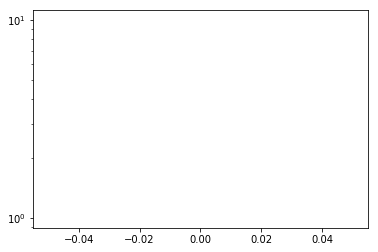

In [17]:
plt.semilogy(mse_list)

ValueError: x and y must have same first dimension, but have shapes (5121,) and (0,)

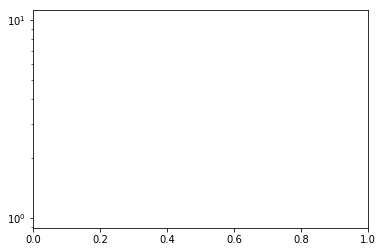

In [21]:
plt.semilogy(test_data[idx,:,0], mse_list_perfect)
plt.semilogy(y_preds_uni_large[idx,:,0], mse_list_regular, label = "regular")
plt.semilogy(y_pred_list_large[idx,:,0], mse_list, label = "depends")
plt.legend()

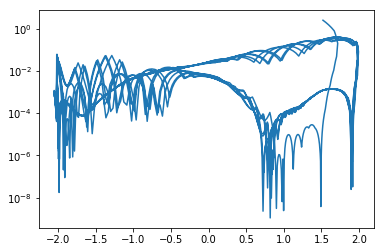

In [62]:
plt.semilogy(y_pred_list_large[idx,:,0], mse_list)

In [18]:
#to calculate error, we find errors between both and take smaller one. 

# y_preds_uni_large[idx,:,0], y_preds_uni_large[idx,:,1]
mse_list = list()
for i in range(len(y_pred_list_large[idx,:,0])):
#     print(y_preds_uni_large[idx,i,0])
#     print("i = ", i)
    try:
        y1 = f_top(y_pred_list_large[idx,i,0])
        y2 = f_bottom(y_pred_list_large[idx,i,0])

    #     print(y_preds_uni_large[idx,i,1])

        mse1 = np.mean((y1 - y_pred_list_large[idx,i,1])**2)
        mse2 = np.mean((y2 - y_pred_list_large[idx,i,1])**2)
        mse_list.append(np.min([mse1, mse2]))
    except:
        
        try:
            y1 = f_top_flipped(y_pred_list_large[idx,i,1])
            y2 = f_bottom_flipped(y_pred_list_large[idx,i,1])

        #     print(y_preds_uni_large[idx,i,1])

            mse1 = np.mean((y1 - y_pred_list_large[idx,i,0])**2)
            mse2 = np.mean((y2 - y_pred_list_large[idx,i,0])**2)
            mse_list.append(np.min([mse1, mse2]))
        except:
            print("i = ", i)
            print(y_pred_list_large[idx,i,0])
            print(y_pred_list_large[idx,i,1])
        

i =  0
1.218286235068556
1.70003234941433
i =  1
1.2326012467353755
1.66462773455931
i =  2
1.2469162584021953
1.6292231197042897
i =  3
1.261231270069015
1.5938185048492697
i =  4
1.2755462817358347
1.5584138899942497
i =  5
1.2898612934026543
1.5230092751392297
i =  6
1.3041763050694741
1.4876046602842095
i =  7
1.3184913167362937
1.4522000454291895
i =  8
1.3328063284031133
1.4167954305741692
i =  9
1.3471213400699331
1.3813908157191492
i =  10
1.3614363517367527
1.3459862008641292
i =  11
1.3757513634035725
1.3105815860091092
i =  12
1.390066375070392
1.275176971154089
i =  13
1.404381386737212
1.239772356299069
i =  14
1.4186963984040315
1.2043677414440488
i =  15
1.433011410070851
1.1689631265890288
i =  16
1.447326421737671
1.1335585117340088
i =  17
1.4555206969380379
1.0968946069478989
i =  18
1.4637149721384048
1.060230702161789
i =  19
1.4719092473387718
1.023566797375679
i =  20
1.4801035225391388
0.9869028925895691
i =  21
1.4882977977395058
0.9502389878034592
i =  22
1.49

i =  488
-1.5261446237564087
0.4586274176836014
i =  489
-1.5215178579092026
0.46128625981509686
i =  490
-1.5168910920619965
0.46394510194659233
i =  491
-1.5122643262147903
0.4666039440780878
i =  492
-1.5076375603675842
0.4692627862095833
i =  493
-1.5030107945203781
0.47192162834107876
i =  494
-1.498384028673172
0.47458047047257423
i =  495
-1.4937572628259659
0.4772393126040697
i =  496
-1.4891304969787598
0.4798981547355652
i =  497
-1.484120935201645
0.48297303169965744
i =  498
-1.47911137342453
0.4860479086637497
i =  499
-1.4741018116474152
0.48912278562784195
i =  500
-1.4690922498703003
0.4921976625919342
i =  501
-1.4640826880931854
0.49527253955602646
i =  502
-1.4590731263160706
0.4983474165201187
i =  503
-1.4540635645389557
0.501422293484211
i =  504
-1.4490540027618408
0.5044971704483032
i =  505
-1.444044440984726
0.5075720474123955
i =  506
-1.439034879207611
0.5106469243764877
i =  507
-1.4340253174304962
0.51372180134058
i =  508
-1.4290157556533813
0.51679667830

-0.30779896676540375
i =  774
1.9131273180246353
-0.3101890981197357
i =  775
1.9093588963150978
-0.3125792294740677
i =  776
1.9055904746055603
-0.31496936082839966
i =  777
1.9018220528960228
-0.31735949218273163
i =  778
1.8980536311864853
-0.3197496235370636
i =  779
1.8942852094769478
-0.32213975489139557
i =  780
1.8905167877674103
-0.32452988624572754
i =  781
1.8867483660578728
-0.3269200176000595
i =  782
1.8829799443483353
-0.3293101489543915
i =  783
1.8792115226387978
-0.33170028030872345
i =  784
1.8754431009292603
-0.3340904116630554
i =  785
1.8714453130960464
-0.33581147715449333
i =  786
1.8674475252628326
-0.33753254264593124
i =  787
1.8634497374296188
-0.33925360813736916
i =  788
1.859451949596405
-0.34097467362880707
i =  789
1.8554541617631912
-0.342695739120245
i =  790
1.8514563739299774
-0.3444168046116829
i =  791
1.8474585860967636
-0.3461378701031208
i =  792
1.8434607982635498
-0.3478589355945587
i =  793
1.839463010430336
-0.34958000108599663
i =  794
1.8

i =  1191
-1.7666779905557632
0.33854121901094913
i =  1192
-1.7628320455551147
0.34015031158924103
i =  1193
-1.7589861005544662
0.3417594041675329
i =  1194
-1.7551401555538177
0.3433684967458248
i =  1195
-1.7512942105531693
0.3449775893241167
i =  1196
-1.7474482655525208
0.3465866819024086
i =  1197
-1.7436023205518723
0.3481957744807005
i =  1198
-1.7397563755512238
0.3498048670589924
i =  1199
-1.7359104305505753
0.3514139596372843
i =  1200
-1.7320644855499268
0.35302305221557617
i =  1201
-1.7280512526631355
0.354778666049242
i =  1202
-1.7240380197763443
0.35653427988290787
i =  1203
-1.720024786889553
0.3582898937165737
i =  1204
-1.7160115540027618
0.36004550755023956
i =  1205
-1.7119983211159706
0.3618011213839054
i =  1206
-1.7079850882291794
0.36355673521757126
i =  1207
-1.7039718553423882
0.3653123490512371
i =  1208
-1.699958622455597
0.36706796288490295
i =  1209
-1.6959453895688057
0.3688235767185688
i =  1210
-1.6919321566820145
0.37057919055223465
i =  1211
-1.68

i =  1441
1.29071194678545
3.5399597883224487
i =  1442
1.3197817951440811
3.448444128036499
i =  1443
1.3488516435027122
3.3569284677505493
i =  1444
1.3779214918613434
3.2654128074645996
i =  1445
1.4069913402199745
3.17389714717865
i =  1446
1.4360611885786057
3.0823814868927
i =  1447
1.4651310369372368
2.9908658266067505
i =  1448
1.494200885295868
2.899350166320801
i =  1449
1.523270733654499
2.807834506034851
i =  1450
1.5523405820131302
2.7163188457489014
i =  1451
1.5814104303717613
2.6248031854629517
i =  1452
1.6104802787303925
2.533287525177002
i =  1453
1.6395501270890236
2.4417718648910522
i =  1454
1.6686199754476547
2.3502562046051025
i =  1455
1.6976898238062859
2.258740544319153
i =  1456
1.726759672164917
2.167224884033203
i =  1457
1.7410618662834167
2.0812401175498962
i =  1458
1.7553640604019165
1.9952553510665894
i =  1459
1.7696662545204163
1.9092705845832825
i =  1460
1.783968448638916
1.8232858180999756
i =  1461
1.7982706427574158
1.7373010516166687
i =  1462

-0.5205271989107132
i =  1853
-1.9767569303512573
-0.4644838981330395
i =  1854
-1.9835801124572754
-0.40844059735536575
i =  1855
-1.9904032945632935
-0.35239729657769203
i =  1856
-1.9972264766693115
-0.2963539958000183
i =  1857
-1.9980482310056686
-0.273813933134079
i =  1858
-1.9988699853420258
-0.25127387046813965
i =  1859
-1.9996917396783829
-0.22873380780220032
i =  1860
-2.00051349401474
-0.206193745136261
i =  1861
-2.001335248351097
-0.18365368247032166
i =  1862
-2.0021570026874542
-0.16111361980438232
i =  1863
-2.0029787570238113
-0.138573557138443
i =  1864
-2.0038005113601685
-0.11603349447250366
i =  1865
-2.0046222656965256
-0.09349343180656433
i =  1866
-2.0054440200328827
-0.070953369140625
i =  1867
-2.00626577436924
-0.04841330647468567
i =  1868
-2.007087528705597
-0.025873243808746338
i =  1869
-2.007909283041954
-0.003333181142807007
i =  1870
-2.008731037378311
0.019206881523132324
i =  1871
-2.0095527917146683
0.041746944189071655
i =  1872
-2.01037454605102

0.6700251363217831
i =  2066
-1.2036555707454681
0.6760317608714104
i =  2067
-1.1965568214654922
0.6820383854210377
i =  2068
-1.1894580721855164
0.688045009970665
i =  2069
-1.1823593229055405
0.6940516345202923
i =  2070
-1.1752605736255646
0.7000582590699196
i =  2071
-1.1681618243455887
0.7060648836195469
i =  2072
-1.1610630750656128
0.7120715081691742
i =  2073
-1.153964325785637
0.7180781327188015
i =  2074
-1.146865576505661
0.7240847572684288
i =  2075
-1.1397668272256851
0.7300913818180561
i =  2076
-1.1326680779457092
0.7360980063676834
i =  2077
-1.1255693286657333
0.7421046309173107
i =  2078
-1.1184705793857574
0.748111255466938
i =  2079
-1.1113718301057816
0.7541178800165653
i =  2080
-1.1042730808258057
0.7601245045661926
i =  2081
-1.0961640402674675
0.7684002555906773
i =  2082
-1.0880549997091293
0.7766760066151619
i =  2083
-1.0799459591507912
0.7849517576396465
i =  2084
-1.071836918592453
0.7932275086641312
i =  2085
-1.0637278780341148
0.8015032596886158
i =  2

-3.670150965452194
i =  2566
-1.0256178751587868
-3.639278471469879
i =  2567
-1.0624114610254765
-3.608405977487564
i =  2568
-1.0992050468921661
-3.577533483505249
i =  2569
-1.1359986327588558
-3.546660989522934
i =  2570
-1.1727922186255455
-3.515788495540619
i =  2571
-1.2095858044922352
-3.484916001558304
i =  2572
-1.2463793903589249
-3.4540435075759888
i =  2573
-1.2831729762256145
-3.4231710135936737
i =  2574
-1.3199665620923042
-3.3922985196113586
i =  2575
-1.356760147958994
-3.3614260256290436
i =  2576
-1.3935537338256836
-3.3305535316467285
i =  2577
-1.4194965809583664
-3.230704829096794
i =  2578
-1.4454394280910492
-3.1308561265468597
i =  2579
-1.471382275223732
-3.0310074239969254
i =  2580
-1.4973251223564148
-2.931158721446991
i =  2581
-1.5232679694890976
-2.8313100188970566
i =  2582
-1.5492108166217804
-2.731461316347122
i =  2583
-1.5751536637544632
-2.631612613797188
i =  2584
-1.601096510887146
-2.5317639112472534
i =  2585
-1.6270393580198288
-2.43191520869

-1.2775248140096664
0.6196594201028347
i =  2816
-1.271737813949585
0.6237210035324097
i =  2817
-1.2651553228497505
0.6288529075682163
i =  2818
-1.258572831749916
0.633984811604023
i =  2819
-1.2519903406500816
0.6391167156398296
i =  2820
-1.2454078495502472
0.6442486196756363
i =  2821
-1.2388253584504128
0.649380523711443
i =  2822
-1.2322428673505783
0.6545124277472496
i =  2823
-1.2256603762507439
0.6596443317830563
i =  2824
-1.2190778851509094
0.6647762358188629
i =  2825
-1.212495394051075
0.6699081398546696
i =  2826
-1.2059129029512405
0.6750400438904762
i =  2827
-1.199330411851406
0.6801719479262829
i =  2828
-1.1927479207515717
0.6853038519620895
i =  2829
-1.1861654296517372
0.6904357559978962
i =  2830
-1.1795829385519028
0.6955676600337029
i =  2831
-1.1730004474520683
0.7006995640695095
i =  2832
-1.1664179563522339
0.7058314681053162
i =  2833
-1.158864974975586
0.7127952091395855
i =  2834
-1.151311993598938
0.7197589501738548
i =  2835
-1.14375901222229
0.72672269

-1.8711687326431274
0.29329729080200195
i =  3441
-1.8675307407975197
0.2948683723807335
i =  3442
-1.863892748951912
0.296439453959465
i =  3443
-1.8602547571063042
0.29801053553819656
i =  3444
-1.8566167652606964
0.2995816171169281
i =  3445
-1.8529787734150887
0.30115269869565964
i =  3446
-1.849340781569481
0.3027237802743912
i =  3447
-1.8457027897238731
0.3042948618531227
i =  3448
-1.8420647978782654
0.30586594343185425
i =  3449
-1.8384268060326576
0.3074370250105858
i =  3450
-1.8347888141870499
0.3090081065893173
i =  3451
-1.831150822341442
0.31057918816804886
i =  3452
-1.8275128304958344
0.3121502697467804
i =  3453
-1.8238748386502266
0.31372135132551193
i =  3454
-1.8202368468046188
0.31529243290424347
i =  3455
-1.816598854959011
0.316863514482975
i =  3456
-1.8129608631134033
0.31843459606170654
i =  3457
-1.8091727271676064
0.32007704116404057
i =  3458
-1.8053845912218094
0.3217194862663746
i =  3459
-1.8015964552760124
0.3233619313687086
i =  3460
-1.79780831933021

i =  3690
0.2901706248521805
3.1711361706256866
i =  3691
0.3202231898903847
3.2251560539007187
i =  3692
0.35027575492858887
3.2791759371757507
i =  3693
0.38032831996679306
3.3331958204507828
i =  3694
0.41038088500499725
3.387215703725815
i =  3695
0.44043345004320145
3.441235587000847
i =  3696
0.47048601508140564
3.495255470275879
i =  3697
0.5073473919183016
3.516146883368492
i =  3698
0.5442087687551975
3.5370382964611053
i =  3699
0.5810701455920935
3.5579297095537186
i =  3700
0.6179315224289894
3.578821122646332
i =  3701
0.6547928992658854
3.599712535738945
i =  3702
0.6916542761027813
3.6206039488315582
i =  3703
0.7285156529396772
3.6414953619241714
i =  3704
0.7653770297765732
3.6623867750167847
i =  3705
0.8022384066134691
3.683278188109398
i =  3706
0.8390997834503651
3.704169601202011
i =  3707
0.875961160287261
3.7250610142946243
i =  3708
0.912822537124157
3.7459524273872375
i =  3709
0.9496839139610529
3.7668438404798508
i =  3710
0.9865452907979488
3.78773525357246

i =  4190
-1.9066776633262634
0.2782365307211876
i =  4191
-1.9032181203365326
0.28022633120417595
i =  4192
-1.8997585773468018
0.2822161316871643
i =  4193
-1.896153673529625
0.28374951146543026
i =  4194
-1.8925487697124481
0.2852828912436962
i =  4195
-1.8889438658952713
0.28681627102196217
i =  4196
-1.8853389620780945
0.2883496508002281
i =  4197
-1.8817340582609177
0.28988303057849407
i =  4198
-1.8781291544437408
0.29141641035676
i =  4199
-1.874524250626564
0.292949790135026
i =  4200
-1.8709193468093872
0.29448316991329193
i =  4201
-1.8673144429922104
0.2960165496915579
i =  4202
-1.8637095391750336
0.29754992946982384
i =  4203
-1.8601046353578568
0.2990833092480898
i =  4204
-1.85649973154068
0.30061668902635574
i =  4205
-1.8528948277235031
0.3021500688046217
i =  4206
-1.8492899239063263
0.30368344858288765
i =  4207
-1.8456850200891495
0.3052168283611536
i =  4208
-1.8420801162719727
0.30675020813941956
i =  4209
-1.8383616358041763
0.308321101590991
i =  4210
-1.834643

0.9465821981430054
i =  4380
-0.9235436916351318
0.9568743705749512
i =  4381
-0.9146958887577057
0.967166543006897
i =  4382
-0.9058480858802795
0.9774587154388428
i =  4383
-0.8970002830028534
0.9877508878707886
i =  4384
-0.8881524801254272
0.9980430603027344
i =  4385
-0.8776154667139053
1.014320157468319
i =  4386
-0.8670784533023834
1.0305972546339035
i =  4387
-0.8565414398908615
1.046874351799488
i =  4388
-0.8460044264793396
1.0631514489650726
i =  4389
-0.8354674130678177
1.0794285461306572
i =  4390
-0.8249303996562958
1.0957056432962418
i =  4391
-0.8143933862447739
1.1119827404618263
i =  4392
-0.803856372833252
1.1282598376274109
i =  4393
-0.79331935942173
1.1445369347929955
i =  4394
-0.7827823460102081
1.16081403195858
i =  4395
-0.7722453325986862
1.1770911291241646
i =  4396
-0.7617083191871643
1.1933682262897491
i =  4397
-0.7511713057756424
1.2096453234553337
i =  4398
-0.7406342923641205
1.2259224206209183
i =  4399
-0.7300972789525986
1.2421995177865028
i =  4400

i =  4940
-1.9337655007839203
0.25851214304566383
i =  4941
-1.9305234923958778
0.26140475552529097
i =  4942
-1.9272814840078354
0.2642973680049181
i =  4943
-1.924039475619793
0.26718998048454523
i =  4944
-1.9207974672317505
0.27008259296417236
i =  4945
-1.917243205010891
0.2717558741569519
i =  4946
-1.9136889427900314
0.27342915534973145
i =  4947
-1.910134680569172
0.275102436542511
i =  4948
-1.9065804183483124
0.2767757177352905
i =  4949
-1.9030261561274529
0.27844899892807007
i =  4950
-1.8994718939065933
0.2801222801208496
i =  4951
-1.8959176316857338
0.28179556131362915
i =  4952
-1.8923633694648743
0.2834688425064087
i =  4953
-1.8888091072440147
0.28514212369918823
i =  4954
-1.8852548450231552
0.2868154048919678
i =  4955
-1.8817005828022957
0.2884886860847473
i =  4956
-1.8781463205814362
0.29016196727752686
i =  4957
-1.8745920583605766
0.2918352484703064
i =  4958
-1.871037796139717
0.29350852966308594
i =  4959
-1.8674835339188576
0.2951818108558655
i =  4960
-1.86

In [20]:
#to calculate error, we find errors between both and take smaller one. 

# y_preds_uni_large[idx,:,0], y_preds_uni_large[idx,:,1]
mse_list_perfect = list()
for i in range(len(test_data[idx,:,0])):
#     print(y_preds_uni_large[idx,i,0])
#     print("i = ", i)
    try:
        y1 = f_top(test_data[idx,i,0])
        y2 = f_bottom(test_data[idx,i,0])

    #     print(y_preds_uni_large[idx,i,1])

        mse1 = np.mean((y1 - test_data[idx,i,1])**2)
        mse2 = np.mean((y2 - test_data[idx,i,1])**2)
        mse_list_perfect.append(np.min([mse1, mse2]))
    except:
        
        try:
            y1 = f_top_flipped(test_data[idx,i,1])
            y2 = f_bottom_flipped(test_data[idx,i,1])

        #     print(y_preds_uni_large[idx,i,1])

            mse1 = np.mean((y1 - test_data[idx,i,0])**2)
            mse2 = np.mean((y2 - test_data[idx,i,0])**2)
            mse_list_perfect.append(np.min([mse1, mse2]))
        except:
            print("i = ", i)
            print(test_data[idx,i,0])
            print(test_data[idx,i,1])
        

i =  0
1.218286235068556
1.70003234941433
i =  1
1.2027729062240315
1.5800411995213177
i =  2
1.2403734077866775
1.5747047355724968
i =  3
1.2924268996773856
1.54795922293915
i =  4
1.2617073446129157
1.5648887349644145
i =  5
1.3164953976561606
1.512315274884629
i =  6
1.306335226226686
1.4346455365918334
i =  7
1.297936106663466
1.4040719016241272
i =  8
1.3681430650606563
1.4524758174606356
i =  9
1.3335478669066156
1.3765686044427419
i =  10
1.375184476859599
1.3082258722262883
i =  11
1.3731857151284068
1.3308350467563106
i =  12
1.396447614067716
1.2716944676498212
i =  13
1.4329191607202758
1.201653872601489
i =  14
1.3806295224029148
1.1519049982714913
i =  15
1.4554110325474379
1.1619989545357183
i =  16
1.4246750542455107
1.1016615417798357
i =  17
1.4643784885787734
1.1139341104677036
i =  18
1.452067742700782
1.0102104784655768
i =  19
1.422954961902354
0.917572255918848
i =  20
1.4737182432341736
0.9395540591258237
i =  21
1.4742283202290616
0.9399117061266641
i =  22
1.45

i =  686
1.8596335756155675
1.9177630069037526
i =  687
1.8074792001884392
1.8014735441159504
i =  688
1.7966380184124662
1.6848631064264108
i =  689
1.8369072854416022
1.628279889603692
i =  690
1.8225925182680576
1.5441718253476502
i =  691
1.872818604605701
1.408442979253299
i =  692
1.862111925849418
1.3701812479517665
i =  693
1.9044651350590343
1.2674537668917802
i =  694
1.9397142669618777
1.1849913175726354
i =  695
1.918062373420174
1.0799483186314853
i =  696
1.900998906555639
1.1048215885231456
i =  697
1.8989217744587321
0.9322308658196573
i =  698
1.9187229904774126
0.8072684292224253
i =  699
1.974578371525548
0.8080731916204239
i =  700
1.9661939935077586
0.733121167611149
i =  701
1.9904462905068006
0.720609852755303
i =  702
1.9905166091129334
0.6276712702763317
i =  703
1.9589501702577323
0.6229520370951948
i =  704
1.9222701570256835
0.5328325123871869
i =  705
1.9848717228719357
0.5069680125991942
i =  706
1.9856082001457827
0.424322248436851
i =  707
2.041317464203

i =  1221
-1.661695300863018
0.45882017747515597
i =  1222
-1.6162650328009212
0.41554414490448793
i =  1223
-1.636928373378172
0.48149447473044577
i =  1224
-1.666762538080603
0.43973737297846793
i =  1225
-1.5705318096893426
0.44902360223532684
i =  1226
-1.5877396370898107
0.42359814135097335
i =  1227
-1.6604887222606526
0.4752992674961651
i =  1228
-1.6111415720818085
0.40671611592876744
i =  1229
-1.6530680483077853
0.4215578015465236
i =  1230
-1.5821939532623033
0.3698359465365103
i =  1231
-1.6129734349190339
0.49901993788604365
i =  1232
-1.5887616678879484
0.4862305454383179
i =  1233
-1.5973439535364862
0.4025120978383388
i =  1234
-1.6004791654799966
0.4721718621154588
i =  1235
-1.6101217460102937
0.462727262465747
i =  1236
-1.557360309698425
0.4423872582416478
i =  1237
-1.58129961074765
0.4687227638644677
i =  1238
-1.5841200600611043
0.4378393672379667
i =  1239
-1.5377381351433663
0.4109955362154273
i =  1240
-1.5339289607966258
0.38223977346444515
i =  1241
-1.58869

i =  1686
1.2276039984461362
-0.7144966929656039
i =  1687
1.155451496943251
-0.727412858016529
i =  1688
1.1684172864321742
-0.727742642251146
i =  1689
1.1246042777047989
-0.7550187796622557
i =  1690
1.1549175158306035
-0.6856283176259853
i =  1691
1.1276629142276147
-0.7530165176994904
i =  1692
1.115218107483036
-0.7750450743752185
i =  1693
1.1314412934209055
-0.7291969401602901
i =  1694
1.161990848977049
-0.7940388607780836
i =  1695
1.0880780054909684
-0.7805792445023658
i =  1696
1.1181608506896494
-0.7733148383069686
i =  1697
1.085160448126758
-0.7972895184495561
i =  1698
1.1180622368469064
-0.8350257529560668
i =  1699
1.102787503069058
-0.8050266173017409
i =  1700
1.0848423974803956
-0.7950401693549581
i =  1701
1.0695544605282825
-0.829550334700656
i =  1702
1.1174509746136163
-0.8357598499670078
i =  1703
1.0418020443480414
-0.8554691620731673
i =  1704
1.0935337178510103
-0.8003592239184629
i =  1705
1.047067855944914
-0.8630425686967971
i =  1706
1.064630206548743
-

i =  2311
1.8684119271808275
-0.31672402624462376
i =  2312
1.8787207192735198
-0.3877977025468986
i =  2313
1.890558241106134
-0.3599941552917088
i =  2314
1.8047774620703032
-0.3426649309099432
i =  2315
1.7952488511700206
-0.3474968772054633
i =  2316
1.8180507801012147
-0.379562209106139
i =  2317
1.8096898091072973
-0.3198452377208431
i =  2318
1.8076744343879076
-0.3560454974944474
i =  2319
1.7618520705650487
-0.31149389467188776
i =  2320
1.8133263696265047
-0.37351556901747246
i =  2321
1.8023451748354438
-0.32706660371919866
i =  2322
1.8029311941441557
-0.36974139020583746
i =  2323
1.8390255802286064
-0.3602505496684035
i =  2324
1.8279750169641864
-0.3770684884918381
i =  2325
1.7704622887704395
-0.41514636685189366
i =  2326
1.8240147459170484
-0.3818418402115522
i =  2327
1.8158680364215782
-0.36541687417936675
i =  2328
1.80161432930198
-0.32186118441817446
i =  2329
1.8131255337771015
-0.3662167219683255
i =  2330
1.7601121188580067
-0.35096665756557505
i =  2331
1.802

-0.3218231732642865
i =  3061
1.89459430716925
-0.3092596279517495
i =  3062
1.8988021751442248
-0.36732069762594177
i =  3063
1.9062095384505229
-0.3145144636442769
i =  3064
1.8930467339244927
-0.36256247826207433
i =  3065
1.875119965420446
-0.35307783721408825
i =  3066
1.8605919958182544
-0.26332863769616577
i =  3067
1.8597600731526518
-0.4184926704226082
i =  3068
1.8292149983085417
-0.3807211119231217
i =  3069
1.8410972751106534
-0.3310227681969347
i =  3070
1.8787420678132731
-0.31674789270706716
i =  3071
1.8842675532576896
-0.4165817944252597
i =  3072
1.8813066471558786
-0.3453989881455989
i =  3073
1.8421294264349668
-0.35617812678763827
i =  3074
1.821070754210032
-0.3488595717629997
i =  3075
1.8887937275492508
-0.3546853708647583
i =  3076
1.9121709905476445
-0.31016219477364876
i =  3077
1.8496687846715267
-0.3520056771839804
i =  3078
1.833402536555691
-0.3740929388127837
i =  3079
1.8080062278930678
-0.36598677391616535
i =  3080
1.8721564619777267
-0.35167508727393

-0.36413477194813965
i =  3811
2.001478377798287
-0.3507621727046009
i =  3812
1.9812567315256702
-0.31786966783515097
i =  3813
1.9792096647519364
-0.3069153291216824
i =  3814
1.9455177509341783
-0.3013820132302617
i =  3815
1.934990736157199
-0.3418515843206145
i =  3816
1.9379312930840766
-0.31756096212770557
i =  3817
1.8815770283516657
-0.33006404409777823
i =  3818
1.97656198496419
-0.3015093823147698
i =  3819
1.9332123775208823
-0.3165127542547427
i =  3820
1.9013267083554033
-0.34148046223236417
i =  3821
1.8991888550843314
-0.33672661652659086
i =  3822
1.895523429684089
-0.32188977337205277
i =  3823
1.9259302975214299
-0.3044119239076231
i =  3824
1.9141062415075134
-0.2766211023578824
i =  3825
1.9077142735807515
-0.37964742780205224
i =  3826
1.9000334954745843
-0.33985536135723576
i =  3827
1.8592286957253228
-0.26793508018534923
i =  3828
1.8452526770696631
-0.31475637285258246
i =  3829
1.8977637867597736
-0.34618243694451495
i =  3830
1.9413200405955267
-0.3192120953

1.9819605282710706
-0.2272869241456853
i =  4561
2.0105685106657925
-0.1966675795908135
i =  4562
1.9582493910746472
-0.2188010491676002
i =  4563
1.9534978785183241
-0.2416001020974448
i =  4564
1.9923995843540696
-0.24688218527502312
i =  4565
1.9651232416095106
-0.3231379414598825
i =  4566
1.9866608393194496
-0.22122059437998398
i =  4567
1.9482315631326652
-0.2785040362844235
i =  4568
1.9811285481732501
-0.24895750845414916
i =  4569
1.979860756962271
-0.23872445857396946
i =  4570
1.9460585385127398
-0.3256686316706182
i =  4571
1.9290474125285866
-0.30020032533614993
i =  4572
1.966470500720124
-0.3541394301516101
i =  4573
1.926242028447575
-0.32487440823652697
i =  4574
1.908398329819123
-0.2702238210113522
i =  4575
1.9718038507887496
-0.2887062883927492
i =  4576
1.9047070564433917
-0.2784384973673838
i =  4577
1.9236481981346267
-0.34244769090778243
i =  4578
1.9753342724611387
-0.3023474569451969
i =  4579
1.9485606864518972
-0.35498100014917866
i =  4580
1.92890202111203

[  54  339  719 1101 1482 1864 2245 2627 3008 3390 3771 4153 4534 4915]


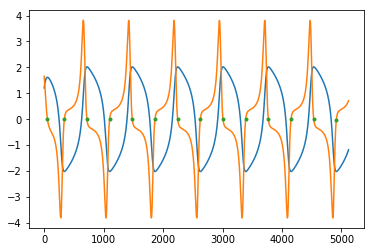

In [71]:
#can only do top and bottom half
plt.plot(test_data_perfect[0,:,0])
plt.plot(test_data_perfect[0,:,1])#, test_data_perfect[0,:,1])

a = test_data_perfect[0,:,1]
zero_crossings = np.where(np.diff(np.sign(a)))[0]
print(zero_crossings)

plt.plot(zero_crossings, test_data_perfect[0,zero_crossings,1], '.')

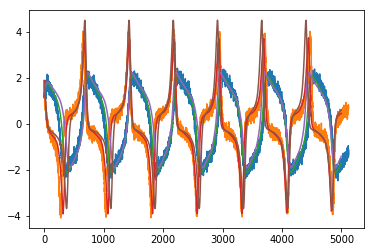

In [235]:
# y_preds = models_regular[2].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)



plt.plot(test_data[0,:,0])
plt.plot(test_data[0,:,1])

plt.plot(y_preds[0,:,0])
plt.plot(y_preds[0,:,1])


# plt.plot(test_data[0,:,0])
# plt.plot(test_data[0,:,1])

plt.plot(t_list_small, y_pred_list_small[0,:,0])
plt.plot(t_list_small, y_pred_list_small[0,:,1])


In [22]:
#making it so we can consider any path to get there 
#need all the path combos 

all_combos = np.load('all_combos_'+str(step_size)+'.npy', allow_pickle=True)
print(all_combos)

[(4, 4) (8,) (4, 4, 4) ... (16, 16, 8, 16, 8) (16, 16, 16, 8, 8)
 (16, 16, 16, 16)]


In [29]:
#pick a random combo


#want to find mse when just considering the smaller timescale

def predict_random_combo(model1, test_data=test_data, timesteps = 5000, to_plot=True):

    t = 0
    
    idx_combo = random.sample(range(len(all_combos)), 1)
    path = all_combos[idx_combo[0]]
    print(path)
    
    steps_per_combo = sum(path)

    path_loops = timesteps // steps_per_combo + 1
    
#     print("path_loops = ", path_loops)
    n_timepoints = path_loops * len(path)
#     print("n_steps = ", n_timepoints)
    
    n_test_points, _, ndim = test_data.shape


    t_list = np.zeros(n_timepoints)
    y_pred_list = np.zeros((n_test_points, n_timepoints, ndim))

    this_step_size = path[0]
    t+= this_step_size
    y_preds = model1.forward(torch.tensor(test_data[:, 0]).float(), str(this_step_size))
    y_pred_list[:,0] = y_preds.detach().numpy()
    t_list[0] = t
#     print(y_preds.shape)

    for j in range(n_timepoints-1):
        this_step_size = path[j%len(path)]
        t+= this_step_size
        y_preds = model1.forward(y_preds, str(this_step_size))

        y_pred_list[:,j+1] = y_preds.detach().numpy()
        t_list[j+1] = t
        
    if to_plot:
        plt.plot(t_list, y_pred_list[0,:,0])
        plt.plot(t_list, test_data[0,t_list.astype(int), 0])
        plt.show()
    
    mse = np.mean((y_pred_list - test_data[:,t_list.astype(int)])**2, axis = (0,2))
    if to_plot:
        plt.semilogy(t_list, mse)
        plt.show()
    
    return y_pred_list, mse, t_list, path
    hjk

    
    # need to interpolate between timesteps
    y_pred_list_new = np.zeros((n_test_points, timesteps - step_size, ndim))
    t_list_new = np.arange(step_size, timesteps)
    for i in range(len(y_pred_list)):
        for j in range(2):
            f = interp1d(t_list, y_pred_list[i,:,j])
            y_pred_list_new[i,:,j] = f(t_list_new)
    
    plt_idx = 1
    
    if to_plot:

        plt.plot(t_list_new, test_data[plt_idx,t_list_new.astype(int), 1])
        plt.plot(t_list_new, test_data[plt_idx,t_list_new.astype(int), 0])
#         plt.plot(t_list_new, test_data[plt_idx,t_list_new.astype(int), 2])

        plt.plot(t_list_new, y_pred_list_new[plt_idx,:, 1])
        plt.plot(t_list_new, y_pred_list_new[plt_idx,:, 0])
#         plt.plot(t_list_new, y_pred_list_new[plt_idx,:, 2])
        plt.title("step_size = " + str(step_size)+ ": noise = "+ str(noise))

        plt.show()
    
    mse = np.mean((y_pred_list_new - test_data[:,t_list_new.astype(int)])**2, axis = (0,2))
    if to_plot:
        plt.semilogy(t_list_new, mse)
        plt.title("step_size = " + str(step_size)+ ": noise = "+ str(noise))
        plt.show()
    
    
    return y_pred_list_new, mse, t_list_new
 
num_lines = 50
mse_list = list()
t_list_list = list()
path_list = list()

for i in range(num_lines):
    y_preds, mse, t_list, path = predict_random_combo(models[0], to_plot = False)
    mse_list.append(mse)
    t_list_list.append(t_list)
    path_list.append(path)



(8, 8, 8, 4, 16, 4, 16)
(8, 4, 8, 8, 16, 4)
(4, 16, 8, 8, 16, 4)
(4, 16, 8, 4, 16, 8)
(8, 16, 4, 4, 8, 8, 4)
(16, 4, 4, 8, 4, 8, 8)
(16, 8, 16, 8, 4, 4, 8)
(8, 16, 4, 16, 8, 8)
(16, 8, 8, 4)
(8, 4, 16, 4, 4)
(16, 8, 8, 16, 4, 8)
(8, 16, 4, 8, 4, 16, 8)
(16, 16, 4, 8, 8, 4)
(8, 8, 16, 4, 4, 16, 8)
(8, 4, 16, 8, 4)
(16, 8, 4, 4, 4, 8)
(4, 16, 8)
(8, 4, 16, 4, 8, 16)
(16, 16, 4, 8, 4, 8, 4)
(8, 16, 4, 4, 8, 4, 8)
(8, 16, 8, 4)
(8, 4, 16, 4, 4, 8, 16)
(8, 4, 8, 8, 16, 16)
(4, 8, 8, 16)
(16, 4, 8, 16, 4, 8, 8)
(8, 8, 8, 16, 16)
(16, 4, 8, 16, 4, 8, 8)
(16, 8, 8, 4, 16, 8)
(8, 16, 16, 8, 8)
(4, 8, 16, 8, 4, 4, 16)
(16, 4, 8, 4, 16, 4)
(4, 8, 16, 8, 8, 4, 16)
(8, 4, 16, 16, 8, 4)
(8, 16, 16, 4, 4, 8, 4)
(16, 4, 16, 4, 8, 8, 8)
(4, 4, 4, 8, 16, 16, 8)
(8, 8, 4, 4, 8)
(8, 8, 8, 4, 16, 4)
(8, 4, 8, 8, 16, 4, 4)
(4, 8, 4, 16, 8)
(4, 4, 16, 8, 8, 4)
(4, 16, 16, 16, 4)
(8, 16, 4, 8, 4, 4, 8)
(8, 16, 4, 16, 4, 16)
(8, 8, 16, 4, 8, 4, 16)
(16, 8, 8, 4, 8, 16, 4)
(4, 4, 4, 16, 8, 16, 8)
(4, 8, 8, 4, 4

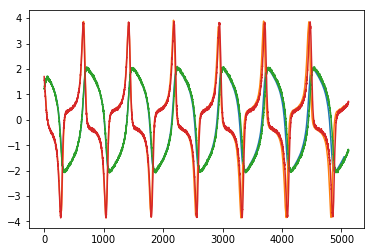

In [30]:
plt.plot(t_list, y_preds[0,:,0])
plt.plot(t_list, y_preds[0,:,1])

plt.plot(test_data[0,:,0])
plt.plot(test_data[0,:,1])

Text(0.5,1,'Test mse with different paths: Model 29')

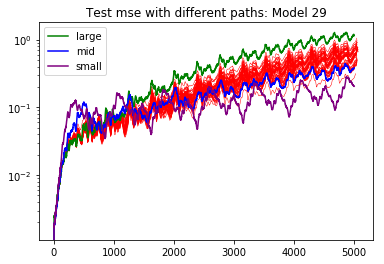

In [31]:
for i in range(len(mse_list)):
    plt.semilogy(t_list_list[i], mse_list[i], 'r', linewidth = 0.5)#, label = path_list[i])
    
plt.semilogy(t_list_large, mse_large, 'g',  label = "large")
plt.plot(t_list_mid, mse_mid, 'b' , label = "mid")
plt.plot(t_list_small, mse_small, 'purple', label = "small")
plt.legend()
plt.title("Test mse with different paths: Model 29")

# n_steps=5000
# y_preds = models_regular[0].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
# mse = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
# plt.plot(mse, 'g', linewidth = 0.5, label = "small regular")

# y_preds = models_regular[1].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
# mse = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
# plt.plot(mse, 'g', linewidth = 0.5, label = "mid regular")

# y_preds = models_regular[2].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
# mse = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
# plt.plot(mse, 'g', linewidth = 0.5, label = "large regular")
# plt.legend()

# plt.xlim([0,1000])
    

NameError: name 't_list1' is not defined

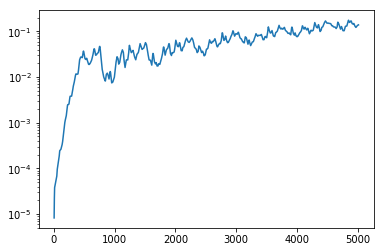

In [144]:
plt.semilogy(t_list, mse, label = 'first')
plt.plot(t_list1, mse1, label = 'second')

plt.semilogy(t_list_large, mse_large, label = "large")
plt.plot(t_list_mid, mse_mid, label = "mid")
plt.plot(t_list_small, mse_small, label = "small")
plt.legend()
# plt.title("mse general: noise = " + str(noise))


    

# plt.xlim([0,1000])

In [32]:
#pick a random combo and use that to predict from regular training

#want to find mse when just considering the smaller timescale

def predict_random_combo_regular(models, step_sizes = [4,8,16], test_data=test_data, timesteps = 5000, to_plot=True):

    t = 0
    
    idx_combo = random.sample(range(len(all_combos)), 1)
    path = all_combos[idx_combo[0]]
    print(path)
    
    steps_per_combo = sum(path)

    path_loops = timesteps // steps_per_combo + 1
    
#     print("path_loops = ", path_loops)
    n_timepoints = path_loops * len(path)
#     print("n_steps = ", n_timepoints)
    
    n_test_points, _, ndim = test_data.shape


    t_list = np.zeros(n_timepoints)
    y_pred_list = np.zeros((n_test_points, n_timepoints, ndim))

#     this_step_size = path[0]
#     t+= this_step_size
    y_preds = torch.tensor(test_data[:, 0]).float()
#     y_preds = model1.forward(torch.tensor(test_data[:, 0]).float(), str(this_step_size))
#     y_pred_list[:,0] = y_preds.detach().numpy()
#     t_list[0] = t
#     print(y_preds.shape)

    for j in range(1, n_timepoints):
        this_step_size = path[j%len(path)]
        t+= this_step_size
        if this_step_size == 4:
            y_preds = models[0].forward(y_preds)
        elif this_step_size == 8:
            y_preds = models[1].forward(y_preds)
        else:
            y_preds = models[2].forward(y_preds)

        y_pred_list[:,j] = y_preds.detach().numpy()
        t_list[j] = t
        
    if to_plot:
        plt.plot(t_list, y_pred_list[0,:,0])
        plt.plot(t_list, test_data[0,t_list.astype(int), 0])
        plt.show()
    
    mse = np.mean((y_pred_list - test_data[:,t_list.astype(int)])**2, axis = (0,2))
    if to_plot:
        plt.semilogy(t_list, mse)
        plt.show()
    
    return y_pred_list, mse, t_list, path
    
num_lines = 50
mse_list = list()
t_list_list = list()
path_list = list()

for i in range(num_lines):
    y_preds, mse, t_list, path = predict_random_combo_regular(models_regular, to_plot = False)
    mse_list.append(mse)
    t_list_list.append(t_list)
    path_list.append(path)



(16, 8, 16, 4, 16, 4)
(4, 4, 8, 8, 16, 16, 4)
(4, 4, 8, 16, 16, 4, 8)
(8, 16, 8, 4, 16)
(8, 4, 4, 4, 8, 16)
(4, 16, 8, 4, 16, 16)
(4, 4, 16, 8, 8)
(16, 8, 4, 8, 16, 4)
(4, 16, 8, 4, 4, 16)
(8, 4, 4, 8, 4, 16, 8)
(8, 4, 16, 4, 4, 16)
(4, 4, 16, 8, 8, 8)
(16, 16, 4, 4, 4)
(16, 16, 4, 8, 8, 8)
(8, 8, 4, 8, 4, 4, 16)
(4, 16, 16, 8, 8)
(8, 16, 16, 4, 8, 4)
(8, 4, 16, 8, 8, 16)
(8, 8, 16, 4, 16)
(16, 4, 4, 4, 16)
(8, 4, 16, 8, 8, 16)
(8, 8, 8)
(4, 8, 8, 8, 4)
(8, 8, 16, 16, 4, 4)
(4, 8, 8, 4, 16, 8, 4)
(16, 4, 4, 4, 16, 16)
(16, 8, 4, 4, 8, 4, 16)
(16, 8, 8, 4, 4, 16, 4)
(16, 4, 8, 16, 4)
(4, 16, 16, 8, 8, 4, 4)
(4, 16, 16, 8, 8, 8)
(8, 16, 4, 8, 8)
(8, 4, 4, 16, 8, 8, 16)
(4, 16, 16, 16, 4)
(4, 16, 4, 16, 8, 4)
(4, 4, 16, 16, 16, 4)
(8, 16, 8, 4, 4, 16, 4)
(4, 8, 8, 16, 4, 4)
(8, 16, 4, 4, 4, 16)
(8, 8, 4, 4, 8, 16, 16)
(8, 8, 16, 4, 8)
(4, 16, 4, 4, 8, 8)
(4, 4, 16, 8, 8, 4)
(8, 4, 4, 8, 16, 8, 16)
(8, 4, 16, 8, 4)
(4, 16, 4, 16, 8, 8)
(8, 16, 8, 4)
(4, 16, 4, 16, 8, 8)
(8, 4, 4, 4, 16)
(1

/home/kjohnst/multiscale_HiTS_depends/src/ResNet.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preds.insert(0, torch.tensor(x_init).float().to(self.device))


Text(0.5,1,'Test mse with different paths: Regular HiSTs')

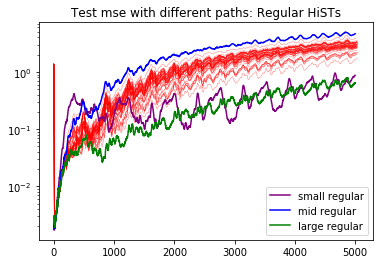

In [33]:
for i in range(len(mse_list)):
    plt.semilogy(t_list_list[i], mse_list[i], 'r', linewidth = 0.25)#, label = path_list[i])
    
n_steps=5000
y_preds = models_regular[0].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
mse = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
plt.plot(mse, 'purple', label = "small regular")

y_preds = models_regular[1].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
mse = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
plt.plot(mse, 'b', label = "mid regular")

y_preds = models_regular[2].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
mse = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
plt.plot(mse, 'g', label = "large regular")
plt.legend()

plt.title("Test mse with different paths: Regular HiSTs")
    

In [115]:
def uni_scale_forecast(self, x_init, n_steps):
        """
        :param x_init: array of shape n_test x input_dim
        :param n_steps: number of steps forward in terms of dt
        :return: predictions of shape n_test x n_steps x input_dim and the steps
        """
        steps = list()
        preds = list()
        sample_steps = range(n_steps)

        # forward predictions
        x_prev = x_init
        cur_step = self.step_size - 1
        while cur_step < n_steps + self.step_size:
            print(x_prev.shape)
            x_next = self.forward(x_prev)
            steps.append(cur_step)
            preds.append(x_next)
            cur_step += self.step_size
            x_prev = x_next
            jk

        # include the initial frame
        steps.insert(0, 0)
        preds.insert(0, torch.tensor(x_init).float().to(self.device))

        # interpolations
        preds = torch.stack(preds, 2).detach().numpy()
        cs = scipy.interpolate.interp1d(steps, preds, kind='linear')
        y_preds = torch.tensor(cs(sample_steps)).transpose(1, 2).float()

        return y_preds
y_preds = uni_scale_forecast(models_regular[0], torch.tensor(test_data[:, 0]).float(), 50)
print(y_preds.shape)
y_preds = models_regular[0].forward(torch.tensor(test_data[:, 0]).float())

torch.Size([320, 2])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (320x2 and 3x1024)

/home/kjohnst/multiscale_HiTS_depends/src/ResNet.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preds.insert(0, torch.tensor(x_init).float().to(self.device))


(0, 1000)

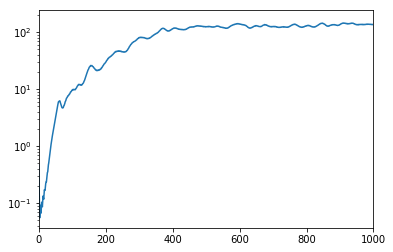

In [158]:
y_preds = models_regular[0].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
mse = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
plt.semilogy(mse, label = "small regular")
plt.xlim([0,1000])

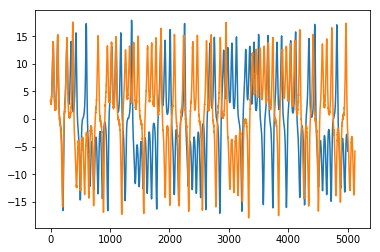

In [159]:
plt.plot(y_preds[0,:,0])
plt.plot(test_data[0,1:,0])

In [ ]:

plt.semilogy(t_list_large, mse_large, label = "large")
plt.semilogy(t_list_mid, mse_mid, label = "mid")
plt.semilogy(t_list, mse_small, label = "small")

plt.xlim([0,1000])
# plt.ylim([0.0001, 1])

# n_steps=5000
# y_preds = models_regular[0].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
# mse = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
# plt.plot(mse, label = "small regular")

# y_preds = models_regular[1].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
# mse = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
# plt.plot(mse, label = "mid regular")

# y_preds = models_regular[2].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
# mse = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
# plt.plot(mse, label = "large regular")
# plt.legend()

# y_preds = net_regular.vectorized_multi_scale_forecast(torch.tensor(test_data[:, 0, :]).float().to('cpu'), n_steps=n_steps, models=models_regular)
# mse_regular = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
# plt.semilogy(mse_regular, label = " multiscale regular")

plt.legend()

In [68]:
to_plot = False
y_pred_list_small, mse_small1, t_list = predict_single_scale(models[0], step_size, test_data=test_data, timesteps = 5000, 
                                                            size="small", to_plot=to_plot)
y_pred_list_large, mse_large1, t_list_large = predict_single_scale(models[0], step_size*4, test_data=test_data, timesteps = 5000, 
                                                                  size="large",to_plot=to_plot)
y_pred_list_mid, mse_mid1, t_list_mid = predict_single_scale(models[0], step_size*2, test_data=test_data, timesteps = 5000, 
                                                            size='mid',to_plot=to_plot)

plt.semilogy(t_list_large, mse_large, 'r', label = "large")
plt.semilogy(t_list_mid, mse_mid, 'orange', label = "mid")
plt.semilogy(t_list, mse_small, 'yellow', label = "small")
plt.legend()
plt.xlim([0,1000])
# plt.ylim([0.0001, 1])

256


KeyError: 'small'

NameError: name 'mse_small1' is not defined

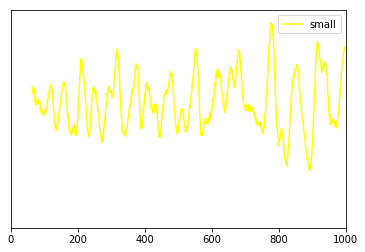

In [69]:
# plt.semilogy(t_list_large, mse_large, 'r', label = "large")
# plt.semilogy(t_list_mid, mse_mid, 'orange', label = "mid")
plt.semilogy(t_list, mse_small, 'yellow', label = "small")
plt.legend()
plt.xlim([0,1000])

# plt.semilogy(t_list_large, mse_large1, 'r--', label = "large")
# plt.semilogy(t_list_mid, mse_mid1, '--', color='orange', label = "mid")
plt.semilogy(t_list, mse_small1, '--', color='yellow', label = "small")

In [70]:
#want to find mse when just considering the both the smaller and larger timescales

def predict_all_3_scale(model1, step_size_small, test_data=test_data, timesteps = 5000):

    step_size_mid = step_size_small * 2
    step_size_large = step_size_small * 4
#     y_pred_list = list()
#     t_list = list()
    t = 0

    points = timesteps // step_size


    t_list = np.arange(step_size,timesteps+1, step_size)
    print(t_list)
    y_pred_list = torch.zeros((320, points, 2))
    
    t+= step_size
    y_preds = model1.forward(torch.tensor(test_data[:, 0]).float(), 'small')
    y_pred_list[:,0] = y_preds#.detach().numpy()
#     t_list[0] = t
    print(y_preds.shape)
    
    t+= step_size
    y_preds = model1.forward(torch.tensor(test_data[:, 0]).float(), 'mid')
    y_pred_list[:,1] = y_preds
#     t_list[1] = t
    print(y_preds.shape)
    
#     t+= step_size
    y_preds = model1.forward(torch.tensor(test_data[:, 0]).float(), 'large')
    y_pred_list[:,3] = y_preds
#     t_list[1] = t
    print(y_preds.shape)

    #predict the large timesteps
    for j in range(7, points, 4):
        y_preds = model1.forward(y_preds, 'large')

        y_pred_list[:,j] = y_preds
        
    #predict the large timesteps
    for j in range(3, points, 4):
        y_preds = model1.forward(y_pred_list[:,j], 'mid')

        try:
            y_pred_list[:,j+2] = y_preds
        except:
            pass
        
    #then do small steps
    for j in range(1, points, 2):
#         t+= step_size
        y_preds = model1.forward(y_pred_list[:,j], 'small')

        try:
            y_pred_list[:,j+1] = y_preds
        except:
            pass
#         t_list[j+1] = t

    y_pred_list = y_pred_list.detach().numpy()
    # need to interpolate between timesteps
    y_pred_list_new = np.zeros((320, timesteps - step_size, 2))
    t_list_new = np.arange(step_size, timesteps)
    for i in range(len(y_pred_list)):
        for j in range(2):
            f = interp1d(t_list, y_pred_list[i,:,j])
            y_pred_list_new[i,:,j] = f(t_list_new)

    
    plt_idx = 1

#     plt.plot(t_list, y_pred_list[plt_idx,:, 1])
#     plt.plot(t_list, y_pred_list[plt_idx,:, 0])
    
    plt.plot(t_list_new, y_pred_list_new[plt_idx,:, 1])
    plt.plot(t_list_new, y_pred_list_new[plt_idx,:, 0])

    plt.plot(t_list, test_data[plt_idx,t_list.astype(int), 1])
    plt.plot(t_list, test_data[plt_idx,t_list.astype(int), 0])
    
    plt.show()

    print("t_list = ", t_list)
    # print(test_data[:,:804:4].shape)
    mse = np.mean((y_pred_list_new - test_data[:,t_list_new.astype(int)])**2, axis = (0,2))

    plt.semilogy(mse)
    
    plt.show()
    
    return y_pred_list_new, mse, t_list_new

# y_pred_list_small, mse_small, t_list = predict_small_scale(models[1], step_size, test_data=test_data, timesteps = 5000)
# y_pred_list_large, mse_large, t_list_large = predict_large_scale(models[1], step_size*2, test_data=test_data, timesteps = 5000)
y_pred_list, mse, t_list = predict_all_3_scale(models[0], step_size, test_data=test_data, timesteps = 5000)

plt.semilogy(t_list, mse_small, label = "small")

plt.semilogy(t_list_large, mse_large, label = "large")
plt.semilogy(t_list, mse, 'k', label = "both")
plt.legend()
plt.xlim([0,1000])

[ 256  512  768 1024 1280 1536 1792 2048 2304 2560 2816 3072 3328 3584
 3840 4096 4352 4608 4864]


KeyError: 'small'

ValueError: x and y must have same first dimension, but have shapes (4936,) and torch.Size([5000])

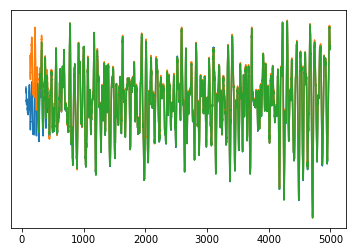

In [71]:
plt.semilogy(t_list, mse_small, label = "small")
plt.semilogy(t_list_mid, mse_mid, label = "mid")
plt.semilogy(t_list_large, mse_large, label = "large")
plt.semilogy(t_list, mse, 'k', label = "both")

plt.xlim([0,1000])

y_preds = net_regular.vectorized_multi_scale_forecast(torch.tensor(test_data[:, 0, :]).float().to('cpu'), n_steps=n_steps, models=models_regular)
mse_regular = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
plt.plot(mse_regular, label = " multiscale regular")

plt.legend()

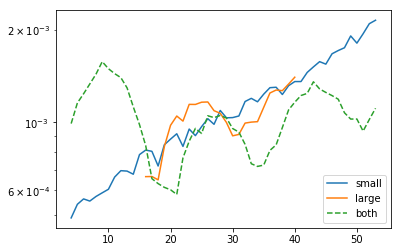

In [123]:
plt.semilogy(t_list[:50], mse_small[:50], label = "small")

plt.semilogy(t_list_large[:25], mse_large[:25], label = "large")
plt.semilogy(t_list[:50], mse[:50], '--', label = "both")
plt.legend()
# plt.xlim([0,200])

In [102]:
print(mse[:20])
print(mse_large[:10])

[0.00043857 0.00048595 0.00055374 0.00069042 0.00073694 0.00078642
 0.00097957 0.00108159 0.00136502 0.00150643 0.00168256 0.00191237
 0.00209405 0.00229929 0.00249592 0.00281474 0.00303126 0.0036193
 0.00409495 0.00461416]
[0.00048595 0.00069042 0.00078642 0.00108159 0.00150643 0.00191237
 0.00229929 0.00281474 0.0036193  0.00461416]


(320, 1250, 2)
(320, 625, 2)


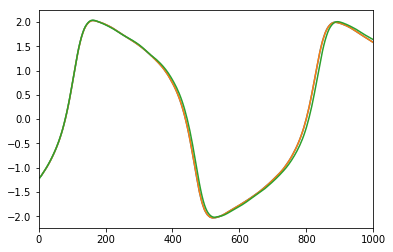

In [99]:
print(y_pred_list.shape)
print(y_pred_list_large.shape)
plt.plot(t_list[1:], y_pred_list[1,1:,0])
plt.plot(t_list_large, y_pred_list_large[1,:,0])
plt.plot(t_list, y_pred_list_small[1,:,0])
plt.xlim([0,1000])
plt.show()
# print(y_pred_list[0,::2,0].shape)
# print( y_pred_list_large[0,:,0].shape)
# plt.plot(y_pred_list[0,1::2,0]- y_pred_list_large[0,:,0])

In [89]:
print(y_pred_list[0,:10,0])
print(y_pred_list_large[0,:10,0])


[1.2760594 1.3328774 1.3878925 1.4327617 1.4744774 1.505684  1.5347683
 1.5559645 1.5757298 1.5860764]
[1.3328774  1.43276167 1.50568402 1.55596447 1.58607638 1.60540092
 1.61285377 1.61104465 1.60261405 1.58785665]


torch.Size([320, 2])


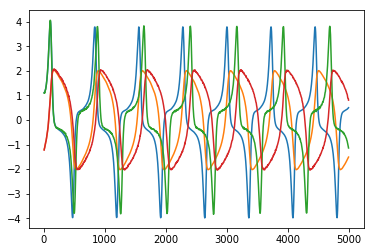

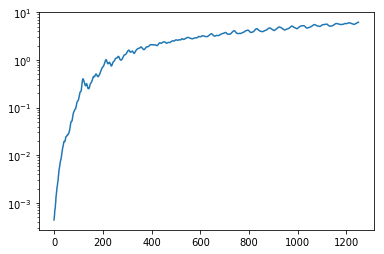

torch.Size([320, 2])


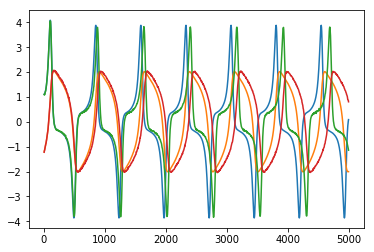

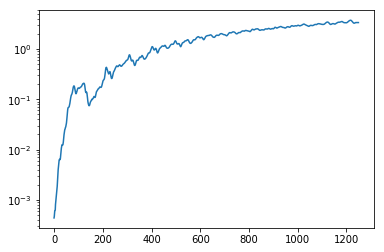

torch.Size([320, 2])


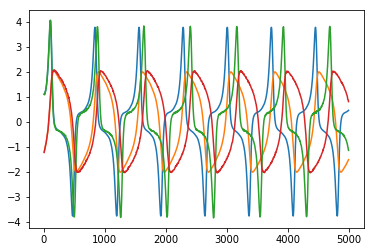

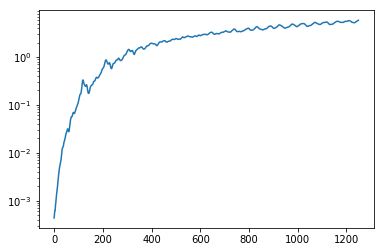

torch.Size([320, 2])


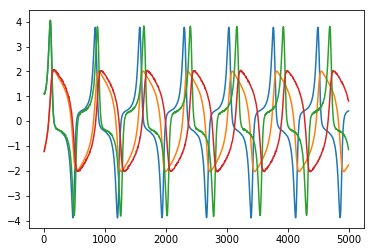

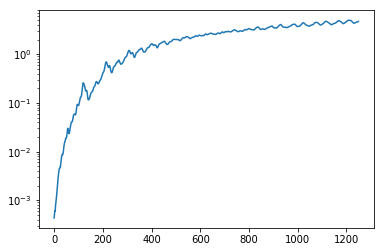

torch.Size([320, 2])


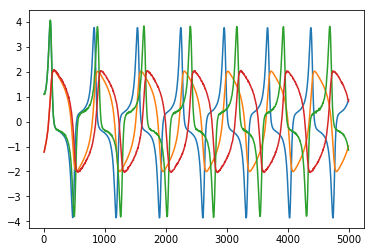

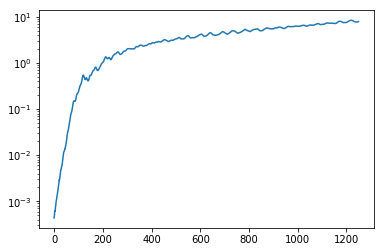

In [55]:
#predict all models
mse_list = list()
y_pred_list = list()
for model in models:
    y_preds, mse, t_list = predict_small_scale(model, step_size)
    mse_list.append(mse)

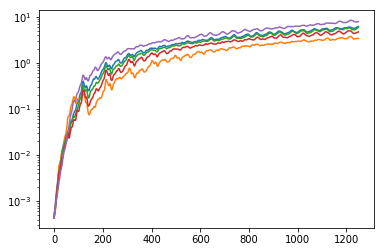

In [34]:
for mse in mse_list:
    plt.semilogy(mse)

In [35]:
#now want to plot the regular way with this one. 
import ResNet as net
test_data = np.load(os.path.join(data_dir, 'test_noise{}.npy'.format(noise)))
# load models
model_dir_regular = os.path.join('../../models/', system)
print(model_dir_regular)
# models = list()
# for noise in noise_levels:
try:
    model_name = 'model_D{}_noise{}.pt'.format(step_size, noise)
    print(model_name)
    model_regular = torch.load(os.path.join(model_dir_regular, model_name), map_location='cpu')
except:
    print("not found")
#     break

# # fix model coistencies trained on gpus (optional)
model_regular.device = 'cpu'
model_regular._modules['increment']._modules['activation'] = torch.nn.ReLU()
  
n_steps = 5000
y_preds = model_regular.uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
mse_regular = torch.mean((y_preds - test_data[:,1:n_steps+1,:])**2, axis = (0,2))

../../models/VanDerPol
model_D4_noise0.01.pt


/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/kjohnst/multiscale_HiTS_depends/src/ResNet.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.t

(0, 1000)

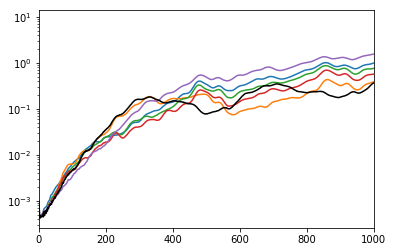

In [37]:
for mse in mse_list:
    plt.semilogy(t_list, mse)
plt.semilogy(mse_regular, 'k')
plt.xlim([0,1000])

In [49]:
print(step_size_list)
print(noise_list)
print(len(step_size_list))

[4, 4, 4, 4, 4]
[0.1, 0.1, 0.1, 0.1, 0.1]
5


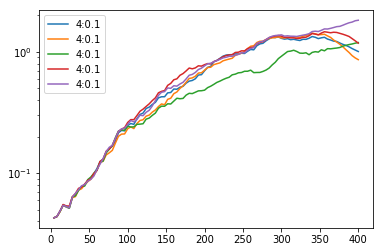

In [51]:
error = 0.2
for i in range(len(mse_list)):
#     if noise_list[i] == error:
        plt.semilogy(t_list_all[i][:100], mse_list[i][:100], label = str(step_size_list[i]) + ":"+ str(noise_list[i]))
    
# plt.title("error = " + str(error))
plt.legend()

In [58]:
# load model from regular way
models = list()
model_dir_regular = '../../models/VanDerPol'
# for noise in noise_levels:
try:
    model_name = 'model_D{}_noise{}.pt'.format(step_size, noise)
    model1 = torch.load(os.path.join(model_dir, model_name), map_location='cpu')
except:
    print("not found")
#     break

# fix model consistencies trained on gpus (optional)
model1.device = 'cpu'
# model1._modules['small']._modules['activation'] = torch.nn.ReLU()
# model1._modules['large']._modules['activation'] = torch.nn.ReLU()
  
    
#want to find mse


timesteps = 5000

y_pred_list = list()
t_list = list()
# step_size = 8
t = 0

points = timesteps // step_size

y_preds = model1.uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=points)


print(points)

t_list = np.zeros(points)
y_pred_list = np.zeros((320, points, 2))

t+= step_size
y_preds = model1.forward(torch.tensor(test_data[:, 0]).float(), step_size)#, 'small')
y_pred_list[:,0] = y_preds.detach().numpy()
t_list[0] = t
print(y_preds.shape)

for j in range(points-1):
    t+= step_size
    y_preds = model1.forward(y_preds)#, 'small')
    
    y_pred_list[:,j+1] = y_preds.detach().numpy()
    t_list[j+1] = t
    
    
plt_idx = 1

plt.plot(t_list, y_pred_list[plt_idx,:, 1])
plt.plot(t_list, y_pred_list[plt_idx,:, 0])

plt.plot(t_list, test_data[plt_idx,t_list.astype(int), 1])
plt.plot(t_list, test_data[plt_idx,t_list.astype(int), 0])

# print(test_data[:,:804:4].shape)
mse4_model1 = np.mean((y_pred_list - test_data[:,t_list.astype(int)])**2, axis = (0,2))
t_list4 = t_list
# plt.xlim([0,1000])
plt.show()

plt.semilogy(mse4_model1)

mse_list.append(mse4_model1)
step_size_list.append(step_size)
noise_list.append(noise)
t_list_all.append(t_list)

TypeError: forward() missing 1 required positional argument: 'step_size'

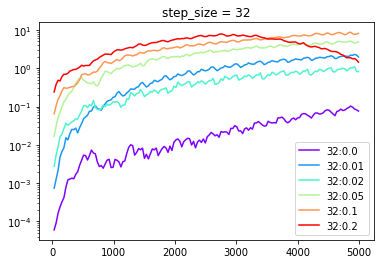

In [448]:
step_size = 32
color = iter(plt.cm.rainbow(np.linspace(0, 1, 6)))
for i in range(len(mse_list)):
    if step_size_list[i] == step_size:
        c = next(color)
        plt.semilogy(t_list_all[i], mse_list[i], label = str(step_size_list[i]) + ":"+ str(noise_list[i]), c=c)
    
plt.title("step_size = " + str(step_size))
plt.legend()

In [219]:
step_size_list

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]

In [56]:
#want to find mse


timesteps = 5000

y_pred_list = list()
t_list = list()
# step_size = 8
t = 0

points = timesteps // step_size

y_preds = model1.uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=points)

# print(points)

# t_list = np.zeros(points)
# y_pred_list = np.zeros((320, points, 2))

# t+= step_size
# y_preds = model2.forward(torch.tensor(test_data[:, 0]).float(), 'small')
# y_pred_list[:,0] = y_preds.detach().numpy()
# t_list[0] = t
# print(y_preds.shape)

# for j in range(points-1):
#     t+= step_size
#     y_preds = model2.forward(y_preds, 'small')
    
#     y_pred_list[:,j+1] = y_preds.detach().numpy()
#     t_list[j+1] = t
    
    
plt_idx = 1

plt.plot(t_list, y_preds[plt_idx,:, 1])
plt.plot(t_list, y_preds[plt_idx,:, 0])

plt.plot(t_list, y_preds[plt_idx,t_list.astype(int), 1])
plt.plot(t_list, y_preds[plt_idx,t_list.astype(int), 0])

# print(test_data[:,:804:4].shape)
mse4_model2 = np.mean((y_pred_list - test_data[:,t_list.astype(int)])**2, axis = (0,2))
t_list4 = t_list
# plt.xlim([0,1000])
plt.show()

plt.semilogy(mse4_model2)

TypeError: forward() missing 1 required positional argument: 'step_size'

1250
torch.Size([320, 2])


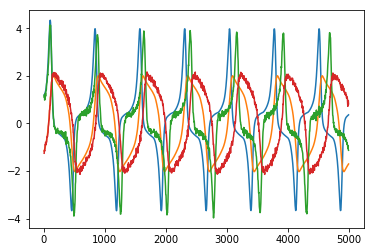

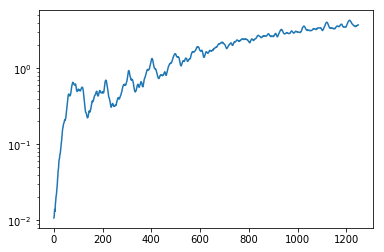

In [133]:
#want to find mse


timesteps = 5000

y_pred_list = list()
t_list = list()
# step_size = 8
t = 0

points = timesteps // step_size

print(points)

t_list = np.zeros(points)
y_pred_list = np.zeros((320, points, 2))

t+= step_size
y_preds = model_regular.forward(torch.tensor(test_data[:, 0]).float())
y_pred_list[:,0] = y_preds.detach().numpy()
t_list[0] = t
print(y_preds.shape)

for j in range(points-1):
    t+= step_size
    y_preds = model_regular.forward(y_preds)
    
    y_pred_list[:,j+1] = y_preds.detach().numpy()
    t_list[j+1] = t
    
    
plt_idx = 1

plt.plot(t_list, y_pred_list[plt_idx,:, 1])
plt.plot(t_list, y_pred_list[plt_idx,:, 0])

plt.plot(t_list, test_data[plt_idx,t_list.astype(int), 1])
plt.plot(t_list, test_data[plt_idx,t_list.astype(int), 0])

# print(test_data[:,:804:4].shape)
mse4__regular = np.mean((y_pred_list - test_data[:,t_list.astype(int)])**2, axis = (0,2))
t_list4 = t_list
# plt.xlim([0,1000])
plt.show()

plt.semilogy(mse4__regular)

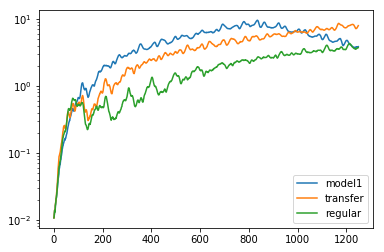

In [134]:
plt.semilogy(mse4_model1, label = "model1")
plt.plot(mse4_model2, label = "transfer")
plt.plot(mse4__regular, label = "regular")
plt.legend()

In [39]:
#want to find mse

y_pred_list = list()
t_list = list()
step_size = 16
t = 0

points = timesteps // step_size

t_list = np.zeros(points)
y_pred_list = np.zeros((320, points, 2))

t+= step_size
y_preds = models[0].forward(torch.tensor(test_data[:, 0]).float(), 'large')
y_pred_list[:,0] = y_preds.detach().numpy()
t_list[0] = t
print(y_preds.shape)

for j in range(points-1):
    t+= step_size
    y_preds = models[0].forward(y_preds, 'large')
    
    y_pred_list[:,j+1] = y_preds.detach().numpy()
    t_list[j+1] = t
    

print(t_list.shape)
print(y_pred_list.shape)

plt.plot(t_list, y_pred_list[0,:, 1])
plt.plot(t_list, y_pred_list[0,:, 0])

plt.plot(t_list, test_data[0,t_list.astype(int), 1])
plt.plot(t_list, test_data[0,t_list.astype(int), 0])
mse8 = np.mean((y_pred_list - test_data[:,t_list.astype(int)])**2, axis = (0,2))
t_list8 = t_list
plt.show()

plt.semilogy(mse8)

IndexError: list index out of range

(0, 1000)

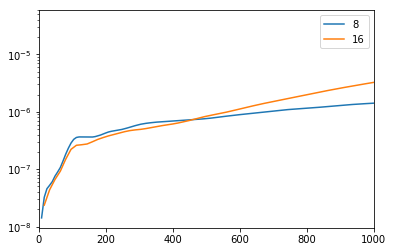

In [87]:
plt.semilogy(t_list4, mse4, label = "8")
plt.semilogy(t_list8, mse8, label = "16")
plt.legend()

plt.xlim([0, 1000])

# plt.ylim([1e-2, 10])

model_D8_noise0.0.pt


/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/kjohnst/multiscale_HiTS_depends/src/ResNet.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.t

Text(0.5,1,'Noise explore of Hyperbolic: step_size = 8')

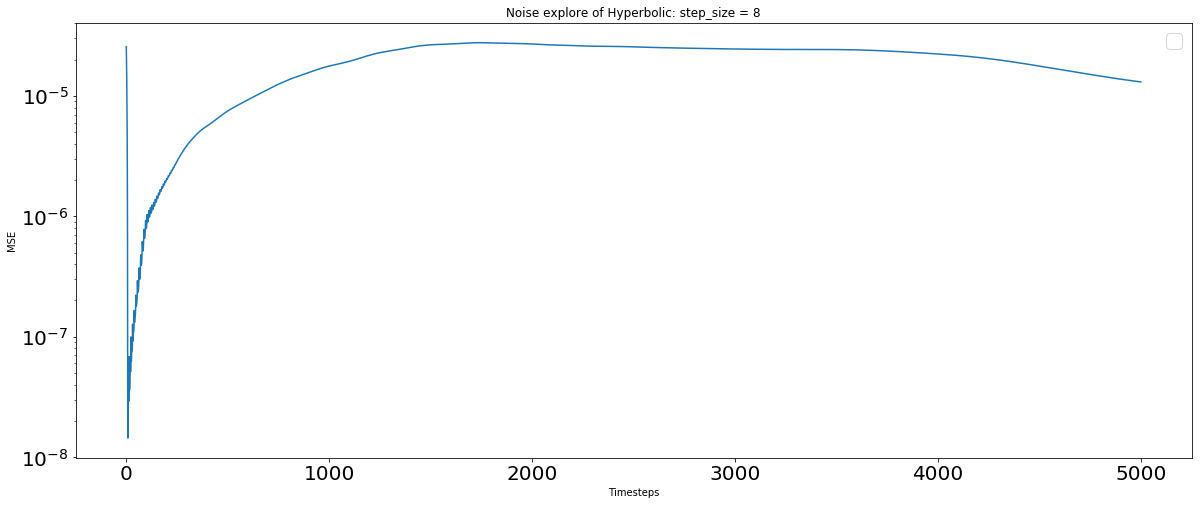

In [72]:
#want to plot with regular way too

step_size = 8
model_dir_regular = os.path.join('../../models/', system)
# load models
models = list()
# for noise in noise_levels:
try:
    model_name = 'model_D{}_noise{}.pt'.format(step_size, noise)
    print(model_name)
    models.append(torch.load(os.path.join(model_dir_regular, model_name), map_location='cpu'))
except:
    print("not found")
#     break

# fix model consistencies trained on gpus (optional)
for model in models:
    model.device = 'cpu'
    model._modules['increment']._modules['activation'] = torch.nn.ReLU()

#graph for d1

mse_list_big = list()
fig = plt.figure(figsize=(20, 8))
colors=iter(plt.cm.rainbow(np.linspace(0, 1, len(models))))
# for k in range(len(preds_mse)):
#     err = preds_mse[k]
#     mean = err.mean(0).detach().numpy()
    
#     plt.semilogy(mean, linestyle='-', color=rgb, linewidth=3.0, label='$\Delta\ t$={}'.format(step_sizes[k]*dt))


n_steps = 5000
for i in range(len(models)):
    test_data = np.load(os.path.join(data_dir, 'test_noise{}.npy'.format(noise)))
    rgb = next(colors)
    y_preds = models[i].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
#     plt.plot(y_preds[0,:,0].cpu().detach().numpy())
#     plt.plot(y_preds[0,:,1].cpu().detach().numpy())

#     plt.plot(test_data[0,1:n_steps,0])#.cpu().detach().numpy())
#     plt.plot(test_data[0,1:n_steps,1])#.cpu().detach().numpy())
# # plt.show()

# print((y_preds_2 - test_data[:,1:,:]).shape)

# print(((y_preds_2 - test_data[:,1:,:])**2).shape)

    mse_regular = torch.mean((y_preds - test_data[:,1:n_steps+1,:])**2, axis = (0,2))
    mse_list_big.append(mse_regular)

    plt.semilogy(mse_regular)#, label = str(noise_levels[i]*100) + "%", color=rgb)

plt.legend(fontsize=20, loc='upper right')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.ylim([1e-2, 10])
plt.ylabel("MSE")
plt.xlabel("Timesteps")
plt.title("Noise explore of " + system + ": step_size = "+ str(step_size))

model_D16_noise0.0.pt


/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/kjohnst/multiscale_HiTS_depends/src/ResNet.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.t

Text(0.5,1,'Noise explore of Hyperbolic: step_size = 16')

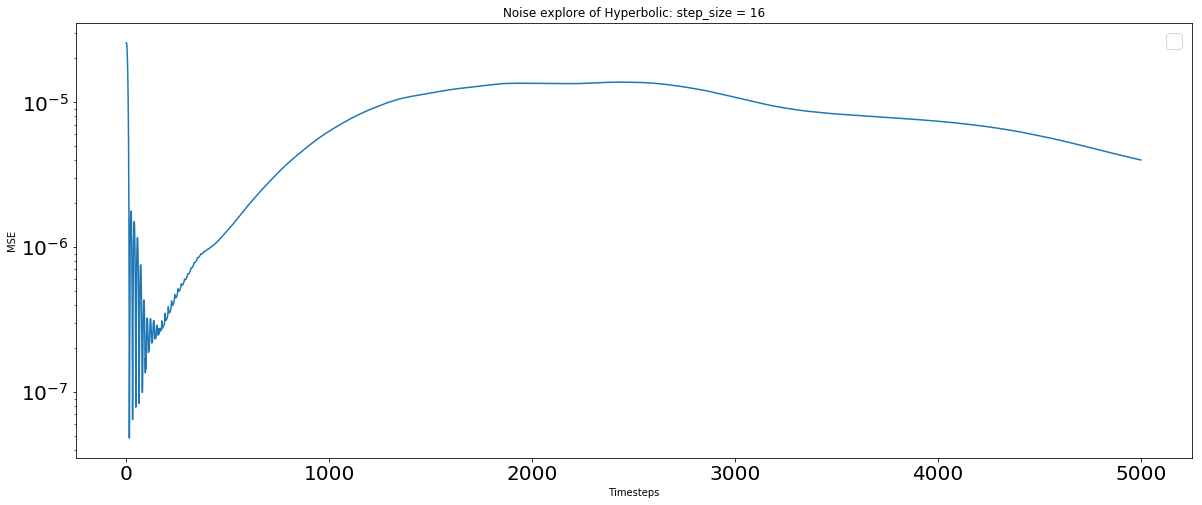

In [73]:
#want to plot with regular way too

step_size = 16
model_dir_regular = os.path.join('../../models/', system)
# load models
models = list()
# for noise in noise_levels:
try:
    model_name = 'model_D{}_noise{}.pt'.format(step_size, noise)
    print(model_name)
    models.append(torch.load(os.path.join(model_dir_regular, model_name), map_location='cpu'))
except:
    print("not found")
#     break

# fix model consistencies trained on gpus (optional)
for model in models:
    model.device = 'cpu'
    model._modules['increment']._modules['activation'] = torch.nn.ReLU()

#graph for d1

mse_list_big = list()
fig = plt.figure(figsize=(20, 8))
colors=iter(plt.cm.rainbow(np.linspace(0, 1, len(models))))
# for k in range(len(preds_mse)):
#     err = preds_mse[k]
#     mean = err.mean(0).detach().numpy()
    
#     plt.semilogy(mean, linestyle='-', color=rgb, linewidth=3.0, label='$\Delta\ t$={}'.format(step_sizes[k]*dt))


n_steps = 5000
for i in range(len(models)):
    test_data = np.load(os.path.join(data_dir, 'test_noise{}.npy'.format(noise)))
    rgb = next(colors)
    y_preds = models[i].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
#     plt.plot(y_preds[0,:,0].cpu().detach().numpy())
#     plt.plot(y_preds[0,:,1].cpu().detach().numpy())

#     plt.plot(test_data[0,1:n_steps,0])#.cpu().detach().numpy())
#     plt.plot(test_data[0,1:n_steps,1])#.cpu().detach().numpy())
# # plt.show()

# print((y_preds_2 - test_data[:,1:,:]).shape)

# print(((y_preds_2 - test_data[:,1:,:])**2).shape)

    mse_regular8 = torch.mean((y_preds - test_data[:,1:n_steps+1,:])**2, axis = (0,2))
    mse_list_big.append(mse_regular8)

    plt.semilogy(mse_regular8)#, label = str(noise_levels[i]*100) + "%", color=rgb)

plt.legend(fontsize=20, loc='upper right')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.ylim([1e-2, 10])
plt.ylabel("MSE")
plt.xlabel("Timesteps")
plt.title("Noise explore of " + system + ": step_size = "+ str(step_size))

312
torch.Size([313])


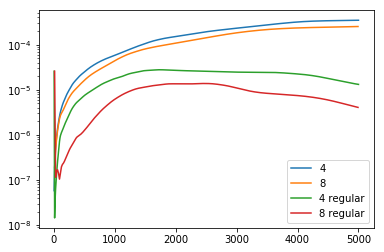

In [75]:
plt.semilogy(t_list4, mse4, label = "4")
plt.semilogy(t_list8, mse8, label = "8")

plt.semilogy(t_list4, mse_regular[::8], label = "4 regular")
print(len(t_list8))
print(mse_regular8[::16].shape)
plt.semilogy(t_list8, mse_regular8[:-10:16], label = "8 regular")
plt.legend()

# plt.xlim([0, 200])

# plt.ylim([1e-2, 1])

In [14]:
mse4.shape

(1250,)

In [24]:

import torch
import numpy as np
import scipy.interpolate
from utils_multiscale import DataSet
import time
def vectorized_multi_scale_forecast(self, x_init, n_steps, step_sizes = [8,4]):
        """
        :param x_init: initial state torch array of shape n_test x n_dim
        :param n_steps: number of steps forward in terms of dt
        :param models: a list of models
        :return: a torch array of size n_test x n_steps x n_dim,
                 a list of indices that are not achieved by interpolations
        """
        # sort models by their step sizes (decreasing order)
#         step_sizes = [model.step_size for model in models]
#         step_sizes = 
#         models = [model for _, model in sorted(zip(step_sizes, models), reverse=True)]

        

        # we assume models are sorted by their step sizes (decreasing order)
        n_test, n_dim = x_init.shape
        device = 'cpu'#'cuda' if torch.cuda.is_available() else 'cpu'
        indices = list()
        extended_n_steps = n_steps + step_sizes[0]
        preds = torch.zeros(n_test, extended_n_steps + 1, n_dim).float().to(device)

        # vectorized simulation
        indices.append(0)
        preds[:, 0, :] = x_init
        total_step_sizes = n_steps
#         for model in models:
        type_models = ['large', 'small']
        for i in [0,1]:
            step_size = step_sizes[i]
            type_model = type_models[i]
            n_forward = int(total_step_sizes/step_size)
            y_prev = preds[:, indices, :].reshape(-1, n_dim)
            indices_lists = [indices]
            for t in range(n_forward):
                y_next = self.forward(y_prev, type_model)
                shifted_indices = [x + (t + 1) * step_size for x in indices]
                indices_lists.append(shifted_indices)
                preds[:, shifted_indices, :] = y_next.reshape(n_test, -1, n_dim)
                y_prev = y_next
            indices = [val for tup in zip(*indices_lists) for val in tup]
            total_step_sizes = step_size - 1

        # simulate the tails
        last_idx = indices[-1]
        y_prev = preds[:, last_idx, :]
        while last_idx < n_steps:
            last_idx += step_size[-1]
            type_model = type_models[-1]
            y_next = mself.forward(y_prev, type_model)
            preds[:, last_idx, :] = y_next
            indices.append(last_idx)
            y_prev = y_next

        print(preds.shape)
        plt.plot(preds[plt_idx,:,0].detach().numpy())
        plt.plot(preds[plt_idx,:,1].detach().numpy())
        
        
        plt.plot(t_list, y_pred_list[plt_idx,:, 1])
        plt.plot(t_list, y_pred_list[plt_idx,:, 0])

        plt.plot(t_list, test_data[plt_idx,t_list.astype(int), 1])
        plt.plot(t_list, test_data[plt_idx,t_list.astype(int), 0])
        plt.xlim([0,1000])

        # interpolations
        sample_steps = range(1, n_steps+1)
        valid_preds = preds[:, indices, :].detach().numpy()
        cs = scipy.interpolate.interp1d(indices, valid_preds, kind='lin/ear', axis=1)
        y_preds = torch.tensor(cs(sample_steps)).float()

        return y_preds
    
step_size = 4
# load models
models = list()
# for noise in noise_levels:
try:
    model_name = 'model_D{}_noise{}.pt'.format(step_size, noise)
    print(model_name)
    models.append(torch.load(os.path.join(model_dir, model_name), map_location='cpu'))
except:
    print("not found")
#     break

# fix model consistencies trained on gpus (optional)
for model in models:
    model.device = 'cpu'
    model._modules['small']._modules['activation'] = torch.nn.ReLU()
    model._modules['large']._modules['activation'] = torch.nn.ReLU()
  

model_D4_noise0.05.pt


/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'Resnet_multiscale.ResNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's sourc

torch.Size([320, 1009, 2])


NotImplementedError: lin/ear is unsupported: Use fitpack routines for other types.

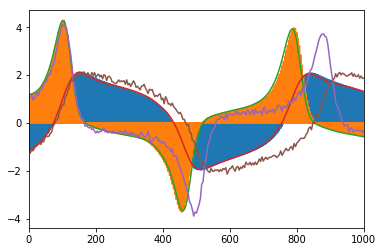

In [25]:
y_preds = vectorized_multi_scale_forecast(models[0], torch.tensor(test_data[:, 0]).float(), 1000)